# Applied Statistics Review

## Notebook Contents:
- [Distributions Overview](#Distributions-Overview)
  - [Inter Quartile Range](#Inter-Quartile-Range)
  - [Outliers](#Outliers)
- [Sampling Methods](#Sampling-Methods)
  - [Central Limit Theorem](#Central-Limit-Theorem)
- [Bootstrap Sampling](#Bootstrap-Sampling)
- [Hypothesis Testing in Python](#Hypothesis-Testing-in-Python)
  - [Standard Score](#Standard-Score)
  - [Hypothesis Tests](#Hypothesis-Tests)
  - [Probability Density Function (PDF) and Cumulative Density Function (CDF)](#Probability-Density-Function-(PDF)-and-Cumulative-Density-Function-(CDF))
  - [Significance Level](#Significance-Level)
  - [Type I and Type II Errors](#Type-I-and-Type-II-Errors)
- [2 Sample t-tests](#2-Sample-t-tests)
    - [Non-Normal Data (Mann-Whitney U Test)](#Non-Normal-Data-(Mann-Whitney-U-Test))
    - [2 Sample t-test (Manual)](#2-Sample-t-test-(Manual))
    - [Paired t-test](#Paired-t-test)
- [ANOVA Tests (Comapring 3+ sample means)](#ANOVA-Tests)
    - [Post-Hoc Analysis (Pairwise t-tests)](#Post-Hoc-Analysis-(Pairwise-t-tests))
    - [Dunnett's Correction for A/B/n Test (pairwise tests vs control)](#Dunnett's-Correction-for-A/B/n-Test)
    - [P-Value Adjustments](#P-Value-Adjustments)
    - [ANOVA (Non Normal Data)](#ANOVA-(Non-Normal-Data))
- [Proportion Tests](#Proportion-Tests)
    - [1 sample z-test](#1-Sample-Proportion-z-test)
    - [2 Sample Proportion z-test](#2-Sample-Proportion-z-test)
    - [Chi-square Test of Independence (2 categorical variables - 3+ comparisons)](#Chi-square-Test-of-Independence)
    - [Chi-square Goodness of Fit Test(1 categorical variable vs hypothesized distribution)](#Chi-square-Goodness-of-Fit-Test)
- [Experimental Design](#Experimental-Design)
    - [Block Randomization](#Block-Randomization)
    - [Stratified Randomization](#Stratified-Randomization)
    - [Factorial Designs](#Factorial-Designs)
    - [Analyzing Effects - Covariate Adjustment](#Analyzing-Effects---Covariate-Adjustment)

In [321]:
!pip install pingouin

In [489]:
!pip install scikit-posthocs

In [490]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as sps
import random
import pingouin as pg
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scikit_posthocs as sp

In [247]:
amir_deals = pd.read_csv('data/amir_deals.csv')

In [248]:
amir_deals = amir_deals.iloc[:, 1:]

In [249]:
amir_deals

product   client status   amount  num_users
0    Product F  Current    Won  7389.52         19
1    Product C      New    Won  4493.01         43
2    Product B      New    Won  5738.09         87
3    Product I  Current    Won  2591.24         83
4    Product E  Current    Won  6622.97         17
..         ...      ...    ...      ...        ...
173  Product A  Current   Lost  5835.32         23
174  Product D  Current    Won  6377.50         12
175  Product D  Current    Won  3537.61         28
176  Product A  Current    Won  6448.07         34
177  Product D      New   Lost  7320.05         72

[178 rows x 5 columns]

# Measures of Spread

## Variance and Standard Deviation

In [250]:
amount_mean = amir_deals['amount'].mean()
print(amount_mean)

4812.000337078652


In [251]:
amir_deals['amount-mean'] = amir_deals['amount'] - amount_mean

In [252]:
amir_deals['(amount-mean)^2'] = amir_deals['amount-mean'] ** 2

In [253]:
amir_deals

product   client status   amount  num_users  amount-mean  \
0    Product F  Current    Won  7389.52         19  2577.519663   
1    Product C      New    Won  4493.01         43  -318.990337   
2    Product B      New    Won  5738.09         87   926.089663   
3    Product I  Current    Won  2591.24         83 -2220.760337   
4    Product E  Current    Won  6622.97         17  1810.969663   
..         ...      ...    ...      ...        ...          ...   
173  Product A  Current   Lost  5835.32         23  1023.319663   
174  Product D  Current    Won  6377.50         12  1565.499663   
175  Product D  Current    Won  3537.61         28 -1274.390337   
176  Product A  Current    Won  6448.07         34  1636.069663   
177  Product D      New   Lost  7320.05         72  2508.049663   

     (amount-mean)^2  
0       6.643608e+06  
1       1.017548e+05  
2       8.576421e+05  
3       4.931776e+06  
4       3.279611e+06  
..               ...  
173     1.047183e+06  
174     2.450789e+06  
175     1.624071e+06  
176     2.676724e+06  
177     6.290313e+06  

[178 rows x 7 columns]

In [254]:
# variance calculation
amount_variance = amir_deals['(amount-mean)^2'].sum() / (amir_deals.shape[0] - 1)

print(f'Variance Manual: {amount_variance}')
print(f'Variance numpy: {np.var(amir_deals['amount'], ddof=1)}') # 'ddof' denotes sample calc vs population

Variance Manual: 4236077.025570508
Variance numpy: 4236077.025570508


In [255]:
# standard deviation calculation
amount_std = np.sqrt(amount_variance)

print(f'Variance Manual: {amount_std}')
print(f'Variance numpy: {np.std(amir_deals['amount'], ddof=1)}')

Variance Manual: 2058.1732253555597
Variance numpy: 2058.1732253555597


In [256]:
amir_deals['amount'].describe()

count     178.000000
mean     4812.000337
std      2058.173225
min      -539.230000
25%      3415.927500
50%      4805.190000
75%      6217.257500
max      9913.270000
Name: amount, dtype: float64

In [257]:
np.quantile(amir_deals['amount'], q = [0, 0.25, 0.5, 0.75, 1])

array([-539.23  , 3415.9275, 4805.19  , 6217.2575, 9913.27  ])

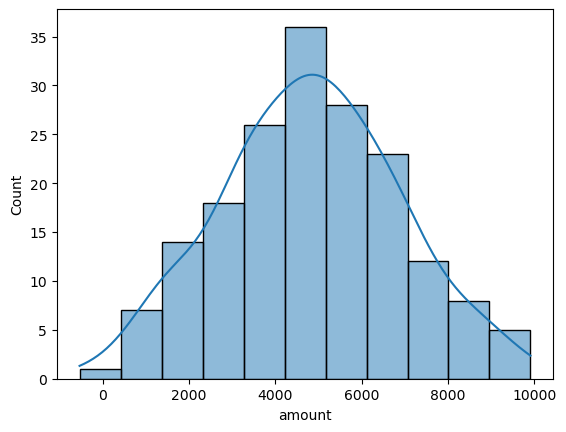

In [258]:
sns.histplot(amir_deals['amount'], kde=True);

## Inter Quartile Range

In [259]:
q_75 = np.quantile(amir_deals['amount'], 0.75)
q_25 = np.quantile(amir_deals['amount'], 0.25)
iqr = q_75 - q_25
print(q_75)
print(q_25)
print(iqr)

6217.2575
3415.9275000000002
2801.3299999999995


## Outliers

In [260]:
outlier_upper = q_75 + (1.5 * iqr)
outlier_lower = q_25 - (1.5 * iqr)
print(f'Outlier Upper Bound: {outlier_upper}')
print(f'Outlier Lower Bound: {outlier_lower}')

Outlier Upper Bound: 10419.252499999999
Outlier Lower Bound: -786.0674999999987


In [261]:
def flag_outlier(x):
    return 1 if x > outlier_upper or x < outlier_lower else 0

In [262]:
amir_deals['outlier_flag'] = amir_deals['amount'].map(flag_outlier)

In [263]:
amir_deals['outlier_flag'].value_counts()

outlier_flag
0    178
Name: count, dtype: int64

---

# Distributions Overview

| **Distribution**      | **Type**                   | **Parameters**                   | **Shape / Support**                  | **Typical Use Cases**                                          |
| --------------------- | -------------------------- | -------------------------------- | ------------------------------------ | -------------------------------------------------------------- |
| **Uniform**           | Continuous / Discrete      | `a`, `b`                         | Flat between *a* and *b*             | Equal-likelihood outcomes, baseline simulation models          |
| **Normal (Gaussian)** | Continuous                 | `μ` (mean), `σ` (std. dev.)      | Bell-shaped, symmetric               | Natural measurements, errors, CLT approximations               |
| **Bernoulli**         | Discrete                   | `p` (prob. of success)           | Two outcomes {0, 1}                  | Binary events (click/no-click, success/failure)                |
| **Binomial**          | Discrete                   | `n` (trials), `p` (success prob) | Discrete hump-shaped                 | Number of successes in *n* trials (e.g., A/B test conversions) |
| **Poisson**           | Discrete                   | `λ` (rate)                       | Right-skewed                         | Count of events in fixed time (web requests, defects)          |
| **Exponential**       | Continuous                 | `λ` (rate)                       | Right-skewed, positive               | Time until next event, queueing, failure analysis              |
| **Geometric**         | Discrete                   | `p` (success prob)               | Right-skewed                         | Trials until first success, sales attempts, retries            |
| **Beta**              | Continuous (bounded [0,1]) | `α`, `β`                         | Flexible, bounded                    | Bayesian priors, modeling probabilities or proportions         |
| **Gamma**             | Continuous                 | `k` (shape), `θ` (scale)         | Right-skewed                         | Waiting time for *k* events, rainfall, insurance claims        |
| **Chi-Squared (χ²)**  | Continuous                 | `k` (degrees of freedom)         | Right-skewed, non-negative           | Variance testing, model fit (goodness-of-fit tests)            |
| **t-Distribution**    | Continuous                 | `ν` (degrees of freedom)         | Symmetric, heavier tails than normal | Hypothesis testing, small-sample mean inference                |
| **Log-Normal**        | Continuous                 | `μ`, `σ` (of log)                | Right-skewed, positive               | Skewed data: income, transaction sizes, durations              |


=== Descriptive Statistics ===
              count      mean       std       min       25%       50%  \
Uniform      1000.0  4.902566  2.921374  0.046320  2.359733  4.968074   
Normal       1000.0  0.098896  0.988933 -2.921350 -0.564121  0.084214   
Exponential  1000.0  1.937428  1.888796  0.000023  0.583995  1.339890   
Beta         1000.0  0.294652  0.162074  0.005368  0.169724  0.279008   
Gamma        1000.0  3.986570  2.842152  0.044495  1.919226  3.251650   
Chi2         1000.0  5.126416  3.123577  0.160749  2.891171  4.523343   
t            1000.0 -0.050420  1.137317 -4.454083 -0.716351 -0.063805   
Binomial     1000.0  5.076000  1.570570  0.000000  4.000000  5.000000   
Bernoulli    1000.0  0.312000  0.463542  0.000000  0.000000  0.000000   
Poisson      1000.0  4.177000  2.093814  0.000000  3.000000  4.000000   
Geometric    1000.0  3.413000  2.936163  1.000000  1.000000  2.000000   

                  75%        max  
Uniform      7.443196   9.997177  
Normal       0.739632 

<Figure size 1400x1000 with 0 Axes>

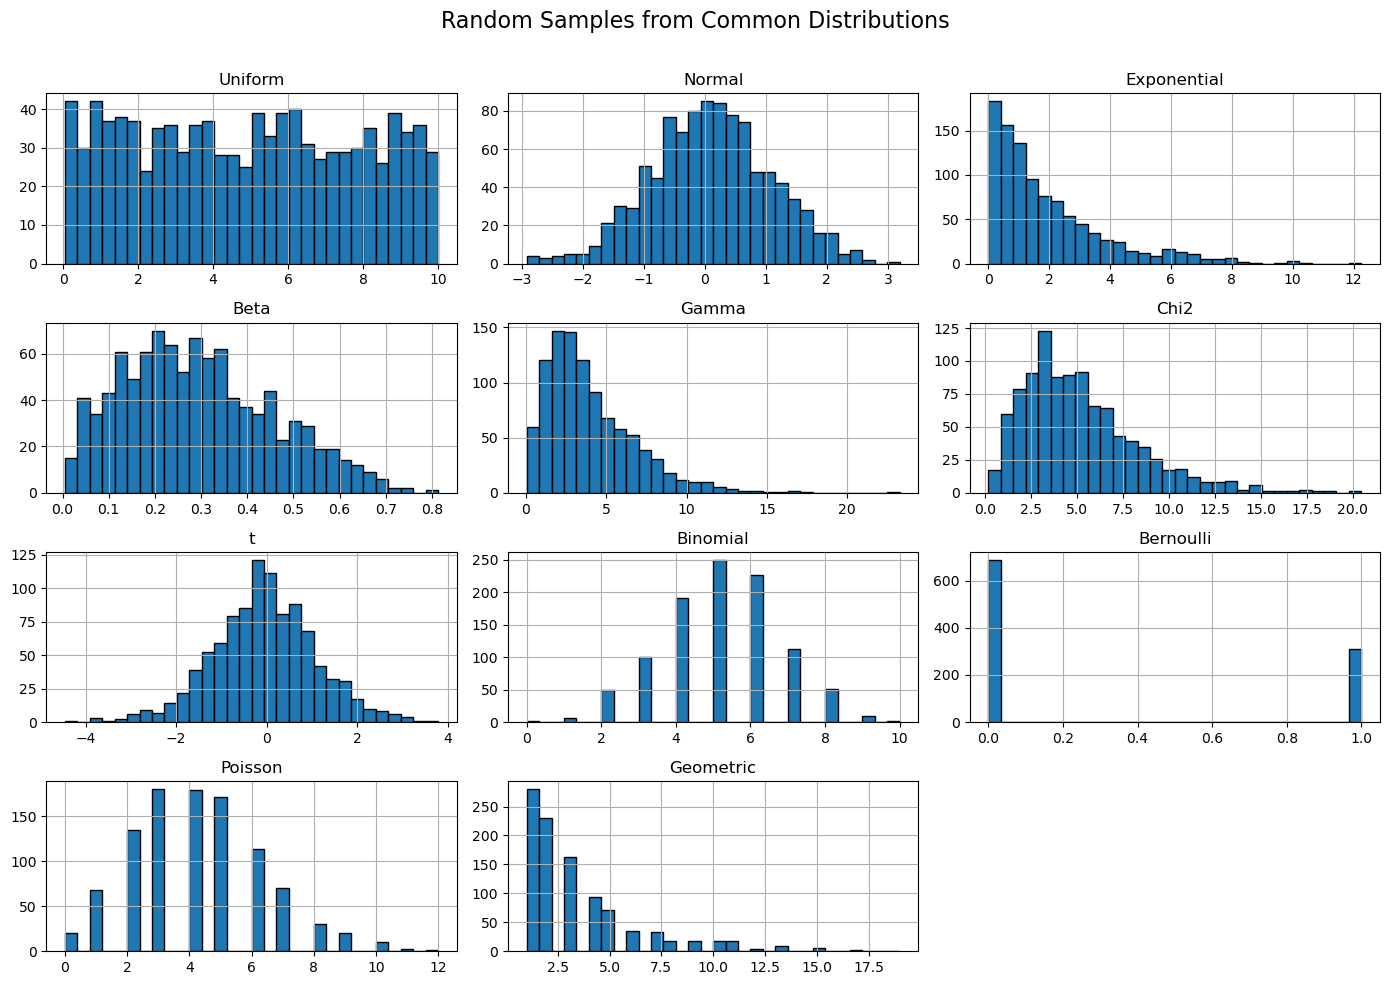

In [264]:
# ============================================
# Generate Random Samples from Common Distributions
# ============================================

import numpy as np
import pandas as pd
from scipy.stats import beta, gamma, chi2, t, lognorm
import matplotlib.pyplot as plt

# --------------------------------------------
# Set random seed for reproducibility
# --------------------------------------------
np.random.seed(42)

# --------------------------------------------
# 1. Generate random samples
# --------------------------------------------

# Continuous distributions
uniform_samples = np.random.uniform(low=0, high=10, size=1000)         # Uniform(a, b)
normal_samples = np.random.normal(loc=0, scale=1, size=1000)           # Normal(μ, σ)
exponential_samples = np.random.exponential(scale=1/0.5, size=1000)    # Exponential(λ)
beta_samples = beta.rvs(a=2, b=5, size=1000)                           # Beta(α, β)
gamma_samples = gamma.rvs(a=2, scale=2, size=1000)                     # Gamma(k, θ)
chi2_samples = chi2.rvs(df=5, size=1000)                               # Chi-Squared(k)
t_samples = t.rvs(df=10, size=1000)                                    # Student-t(ν)

# Discrete distributions
binomial_samples = np.random.binomial(n=10, p=0.5, size=1000)          # Binomial(n, p)
bernoulli_samples = np.random.binomial(n=1, p=0.3, size=1000)          # Bernoulli(p)
poisson_samples = np.random.poisson(lam=4, size=1000)                  # Poisson(λ)
geometric_samples = np.random.geometric(p=0.3, size=1000)              # Geometric(p)

# --------------------------------------------
# 2. Combine into a single DataFrame
# --------------------------------------------
samples_df = pd.DataFrame({
    'Uniform': uniform_samples,
    'Normal': normal_samples,
    'Exponential': exponential_samples,
    'Beta': beta_samples,
    'Gamma': gamma_samples,
    'Chi2': chi2_samples,
    't': t_samples,
    'Binomial': binomial_samples,
    'Bernoulli': bernoulli_samples,
    'Poisson': poisson_samples,
    'Geometric': geometric_samples
})

# --------------------------------------------
# 3. Display summary statistics
# --------------------------------------------
print("=== Descriptive Statistics ===")
print(samples_df.describe().T)

# --------------------------------------------
# 4. Visualize the distributions
# --------------------------------------------
plt.figure(figsize=(14, 10))
samples_df.hist(figsize=(14, 10), bins=30, edgecolor='black')
plt.suptitle("Random Samples from Common Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show();

---

# Sampling Methods

In [265]:
df_coffee = pd.read_feather("data/coffee_ratings_full.feather")

In [266]:
df_coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_cup_points       1338 non-null   float64
 1   species                1338 non-null   object 
 2   owner                  1331 non-null   object 
 3   country_of_origin      1337 non-null   object 
 4   farm_name              979 non-null    object 
 5   lot_number             275 non-null    object 
 6   mill                   1023 non-null   object 
 7   ico_number             1187 non-null   object 
 8   company                1129 non-null   object 
 9   altitude               1112 non-null   object 
 10  region                 1279 non-null   object 
 11  producer               1107 non-null   object 
 12  number_of_bags         1338 non-null   float64
 13  bag_weight             1338 non-null   object 
 14  in_country_partner     1338 non-null   object 
 15  harv

In [267]:
df_coffee.head()

total_cup_points  species                     owner country_of_origin  \
0             90.58  Arabica                 metad plc          Ethiopia   
1             89.92  Arabica                 metad plc          Ethiopia   
2             89.75  Arabica  grounds for health admin         Guatemala   
3             89.00  Arabica       yidnekachew dabessa          Ethiopia   
4             88.83  Arabica                 metad plc          Ethiopia   

                                  farm_name lot_number       mill ico_number  \
0                                 metad plc       None  metad plc  2014/2015   
1                                 metad plc       None  metad plc  2014/2015   
2  san marcos barrancas "san cristobal cuch       None       None       None   
3     yidnekachew dabessa coffee plantation       None    wolensu       None   
4                                 metad plc       None  metad plc  2014/2015   

                                 company       altitude  ...  color  \
0      metad agricultural developmet plc      1950-2200  ...  Green   
1      metad agricultural developmet plc      1950-2200  ...  Green   
2                                   None  1600 - 1800 m  ...   None   
3  yidnekachew debessa coffee plantation      1800-2200  ...  Green   
4      metad agricultural developmet plc      1950-2200  ...  Green   

  category_two_defects        expiration                  certification_body  \
0                  0.0   April 3rd, 2016  METAD Agricultural Development plc   
1                  1.0   April 3rd, 2016  METAD Agricultural Development plc   
2                  0.0    May 31st, 2011        Specialty Coffee Association   
3                  2.0  March 25th, 2016  METAD Agricultural Development plc   
4                  2.0   April 3rd, 2016  METAD Agricultural Development plc   

                      certification_address  \
0  309fcf77415a3661ae83e027f7e5f05dad786e44   
1  309fcf77415a3661ae83e027f7e5f05dad786e44   
2  36d0d00a3724338ba7937c52a378d085f2172daa   
3  309fcf77415a3661ae83e027f7e5f05dad786e44   
4  309fcf77415a3661ae83e027f7e5f05dad786e44   

                      certification_contact unit_of_measurement  \
0  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   
1  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   
2  0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660                   m   
3  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   
4  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   

  altitude_low_meters altitude_high_meters altitude_mean_meters  
0              1950.0               2200.0               2075.0  
1              1950.0               2200.0               2075.0  
2              1600.0               1800.0               1700.0  
3              1800.0               2200.0               2000.0  
4              1950.0               2200.0               2075.0  

[5 rows x 43 columns]

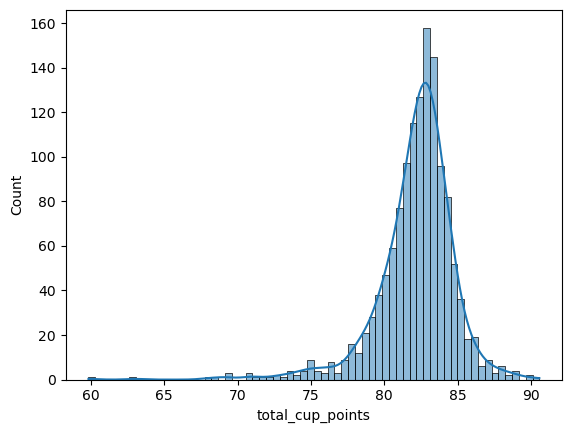

In [268]:
sns.histplot(df_coffee['total_cup_points'], kde=True);

In [269]:
df_coffee['total_cup_points'].describe()

count    1338.000000
mean       82.151203
std         2.686862
min        59.830000
25%        81.102500
50%        82.500000
75%        83.670000
max        90.580000
Name: total_cup_points, dtype: float64

In [270]:
df_coffee['total_cup_points'].sample(frac=0.25, replace=False, random_state=24)

736     82.25
561     82.83
930     81.50
271     83.92
933     81.50
        ...  
23      87.08
799     82.00
1065    80.58
230     84.17
978     81.17
Name: total_cup_points, Length: 334, dtype: float64

## Stratified Sampling

* Split population into subgroups
* Sample within those subgroups
* Use Case:
  * maintain representation within each subgroup
  * ensures there is subgroup representation in the sample

In [271]:
# proportional stratified sampling
    # samples within each 'country_of_origin'
coffee_ratings_strat = df_coffee.groupby(['country_of_origin']).sample(frac=0.25, random_state=2021)

coffee_ratings_strat.groupby(['country_of_origin'])['total_cup_points'].mean()

country_of_origin
Brazil                          82.616364
China                           84.417500
Colombia                        83.496522
Costa Rica                      82.602308
Ecuador                         78.080000
El Salvador                     83.250000
Ethiopia                        84.499091
Guatemala                       81.583778
Haiti                           74.790000
Honduras                        79.488462
India                           82.207500
Indonesia                       81.852000
Kenya                           83.596667
Laos                            82.670000
Malawi                          81.610000
Mexico                          80.935932
Myanmar                         81.040000
Nicaragua                       81.278333
Panama                          80.750000
Peru                            82.750000
Philippines                     82.920000
Taiwan                          82.346842
Tanzania, United Republic Of    82.768000
Thailand        

## Cluster Sampling

* Simple random sample pick a subset of groups
* Simple random sample within just those subgroups
* Use Case:
  * when you have specific subgroups of interest, more so than others

In [272]:
varieties_pop = list(df_coffee['variety'].dropna().unique())
varieties_pop

['Other',
 'Bourbon',
 'Catimor',
 'Ethiopian Yirgacheffe',
 'Caturra',
 'SL14',
 'Sumatra',
 'SL34',
 'Hawaiian Kona',
 'Yellow Bourbon',
 'SL28',
 'Gesha',
 'Catuai',
 'Pacamara',
 'Typica',
 'Sumatra Lintong',
 'Mundo Novo',
 'Java',
 'Peaberry',
 'Pacas',
 'Mandheling',
 'Ruiru 11',
 'Arusha',
 'Ethiopian Heirlooms',
 'Moka Peaberry',
 'Sulawesi',
 'Blue Mountain',
 'Marigojipe',
 'Pache Comun']

In [273]:
import numpy as np
import pandas as pd

# Example: unique coffee varieties (clusters)
varieties_pop = list(df_coffee['variety'].dropna().unique())

# 1️⃣ Randomly select clusters (say, 3 varieties)
np.random.seed(42)
sampled_clusters = np.random.choice(varieties_pop, size=10, replace=False)

print("Sampled clusters (varieties):", sampled_clusters)

# 2️⃣ Select all observations from those clusters
cluster_sample_df = df_coffee[df_coffee['variety'].isin(sampled_clusters)]

cluster_sample_df.groupby(['variety']).sample(frac=0.1, replace=False)

cluster_sample_df['variety'].value_counts()

Sampled clusters (varieties): ['Marigojipe' 'Mundo Novo' 'Catuai' 'Arusha' 'Hawaiian Kona'
 'Yellow Bourbon' 'Ruiru 11' 'Other' 'Blue Mountain' 'Pacamara']


variety
Other             110
Catuai             74
Hawaiian Kona      44
Yellow Bourbon     35
Mundo Novo         33
Pacamara            8
Arusha              6
Ruiru 11            2
Blue Mountain       2
Marigojipe          1
Name: count, dtype: int64

---

# Sampling Distributions

### Sampling Methods

| **Method**                 | **Library / Object**     | **Description**                                                                                           | **Example Usage**                                             |
| -------------------------- | ------------------------ | --------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------- |
| `DataFrame.sample()`       | `pandas`                 | Randomly samples rows or fraction of rows from a DataFrame; supports replacement and stratified sampling. | `df.sample(n=100, replace=True)`                              |
| `np.random.choice()`       | `numpy`                  | Randomly samples elements from an array or list; supports replacement and custom probabilities.           | `np.random.choice(arr, size=50, replace=False)`               |
| `random.sample()`          | `random` (Python stdlib) | Randomly selects a specified number of unique elements from a sequence (no replacement).                  | `random.sample(population, k=10)`                             |
| `sklearn.utils.resample()` | `scikit-learn`           | Bootstrap-style resampling for arrays or DataFrames (with or without replacement).                        | `resample(df, n_samples=1000, replace=True, random_state=42)` |

## Central Limit Theorem 

* With repeated sampling of population mean, as number of samples increases, the distribution of the sample meamns approximates a normal distribution
* And the width of the sampling distribution tends to get narrower (as sample size increases)

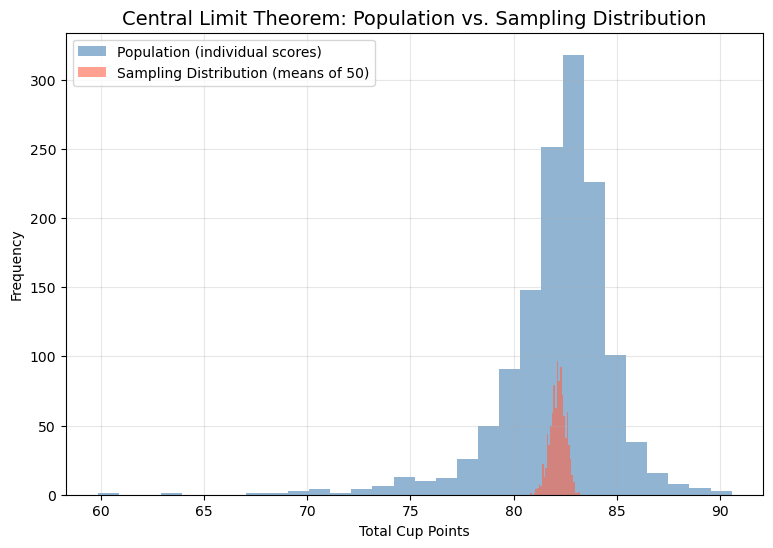

=== Descriptive Statistics ===
Population Mean: 82.15, Std: 2.69
Sampling Distribution Mean: 82.15, Std: 0.38
Expected Theoretical Sampling Std ≈ σ / √n = 0.38
Standard Error = expected standard deviation of the sampling distribution — i.e., how much sample means vary from sample to sample.


In [274]:
# ============================================
# Central Limit Theorem Simulation: Coffee Data
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

population_points = df_coffee['total_cup_points'].dropna().values

# --------------------------------------------
# 2. Generate sampling distribution of the mean
# --------------------------------------------
n_samples = 1000   # number of samples (resamples)
sample_size = 50   # number of observations per sample
total_point_means = []

for i in range(n_samples):
    sample = np.random.choice(population_points, size=sample_size, replace=False)
    total_point_means.append(sample.mean())

sample_means = np.array(total_point_means)

# --------------------------------------------
# 3. Plot population vs. sampling distribution
# --------------------------------------------
plt.figure(figsize=(9, 6))

# Population (raw individual values)
plt.hist(population_points, bins=30, alpha=0.6, color='steelblue', label='Population (individual scores)')

# Sampling distribution of the mean
plt.hist(sample_means, bins=30, alpha=0.6, color='tomato', label='Sampling Distribution (means of 50)')

# Labels and aesthetics
plt.title("Central Limit Theorem: Population vs. Sampling Distribution", fontsize=14)
plt.xlabel("Total Cup Points")
plt.ylabel("Frequency")
plt.legend()
plt.grid(alpha=0.3)

plt.show()

# --------------------------------------------
# 4. Print descriptive statistics
# --------------------------------------------
print("=== Descriptive Statistics ===")
print(f"Population Mean: {population_points.mean():.2f}, Std: {population_points.std():.2f}")
print(f"Sampling Distribution Mean: {sample_means.mean():.2f}, Std: {sample_means.std():.2f}")
print(f"Expected Theoretical Sampling Std ≈ σ / √n = {population_points.std() / np.sqrt(sample_size):.2f}")
print('Standard Error = expected standard deviation of the sampling distribution — i.e., how much sample means vary from sample to sample.')

<br>

INTERPRETATION: 
* Note that the standard deviation is lower for the sampling distribution of means bc rather than taking individual values we taking means across many samples

---

# Bootstrap Sampling

* **Sampling:** going from a population to a smaller sample
* **Bootstrapping:** building up a theoretical population from the sample
    * **Use Case:** Develop an understanding of sampling variability using a single sample
    * **Bootsrapping Process:**
 
  <br>
  
          1. Make a resample of the same size of the original dataset
          2. Calculate the statistic of interest on the bootstrapped sample
          3. Repeat the steps many times

In [275]:
# create boostrapped distribution of total_cup_points mean
# sample is same size of original data
bootstrap_total_means = []
num_resamples = 1000

for i in range(num_resamples):
    bootstrap_mean = np.mean(
        df_coffee.sample(frac=1, replace=True)['total_cup_points'] # frac = 1 (same number rows as df_coffee)
    )
    bootstrap_total_means.append(bootstrap_mean)

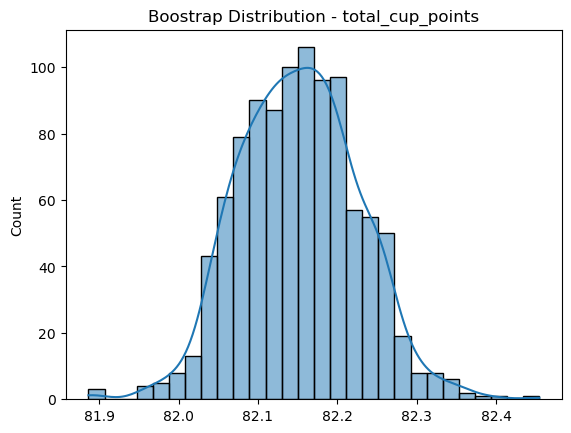

In [276]:
sns.histplot(bootstrap_total_means, kde=True)
plt.title('Boostrap Distribution - total_cup_points')
plt.show();

In [277]:
pop_mean = df_coffee['total_cup_points'].mean()
pop_std = df_coffee['total_cup_points'].std()
boot_mean = np.mean(bootstrap_total_means)
boot_std = np.std(bootstrap_total_means, ddof=1)
boot_se = pop_std / np.sqrt(len(bootstrap_total_means))

print(f'Population Mean and STD: {pop_mean} and {pop_std}')
print(f'Bootstrap Sample Mean, STD, and Standard Error: {boot_mean} and {boot_std} and {boot_se}')

Population Mean and STD: 82.15120328849028 and 2.6868624341866627
Bootstrap Sample Mean, STD, and Standard Error: 82.1516354857997 and 0.07502426094849558 and 0.08496605051574116


**Interpretation:**
* Bootstrap std is much smaller than the single sample std
* Standard deviation remains small even when boostrap means has smaller number of resample iterations, though in each iteration mean is derived from full dataset worth of samples
* If orignal sample is biased, bootstrapped distribution from that sample will also be biased
* The standard error of the boostrap distribution of means approximates the population std

## Standard Error of the Bootstrap Mean Samples
* Standard Deviation (SD) measures how much individual data points vary around the mean — it describes spread in the population or sample.

* **Standard Error (SE) measures how much sample statistics (like sample means) vary from sample to sample — it describes spread of the sampling distribution.**


---

# Confidence Intervals

Definition: If we were to take many random samples and compute a 95% CI for each, about 95% of those intervals would contain the true population mean.

🚫 Common Misconception

It doesn’t mean “there’s a 95% probability the true mean is in this interval.”
Once you have the interval, the true mean either is or isn’t in it — the 95% refers to the long-run success rate of the method, not the probability of this specific interval.

1. Quantile Method
2. Standard Error Method

In [278]:
# CI_95_lower = boot_mean - (2 * boot_std)
# CI_95_upper = boot_mean + (2 * boot_std)

population_points = df_coffee['total_cup_points'].dropna().values

# quantile method
CI_95_lower = np.percentile(bootstrap_total_means, 2.5)
CI_95_upper = np.percentile(bootstrap_total_means, 97.5)

print(f"Bootstrap Mean: {boot_mean:.2f}")
print(f"Bootstrap Std (SE): {boot_std:.2f}")
print(f"Approx. 95% CI: [{CI_95_lower:.2f}, {CI_95_upper:.2f}]")

Bootstrap Mean: 82.15
Bootstrap Std (SE): 0.08
Approx. 95% CI: [82.02, 82.29]


In [279]:
# Standard Error Method
point_estimate = np.mean(bootstrap_total_means)
std_error = np.std(bootstrap_total_means, ddof=1) # estimate of standard error

from scipy.stats import norm
lower = norm.ppf(0.025, loc=point_estimate, scale=std_error)
upper = norm.ppf(0.975, loc=point_estimate, scale=std_error)

print(lower, upper)

82.00459063637392 82.29868033522548


---

# Hypothesis Testing in Python

* standard score (Ex: z-score (normal distribtuion)
* p-vales
* statistical significance
* confidence intervals
* Type I & Type II Errors

In [280]:
df_athletic = pd.read_csv('data/athletic_perf.csv')
df_athletic.head()

Athlete_ID Training_Program    Diet_Type Initial_Fitness  Performance_Inc
0           1         Strength         Keto             Low         8.749524
1           2             HIIT  Plant-Based            High         9.452781
2           3         Strength  Plant-Based             Low        13.928506
3           4         Strength  Plant-Based            High         9.605557
4           5             HIIT  Plant-Based             Low         7.547894

In [281]:
df_athletic['Performance_Inc'].describe()

count    300.000000
mean      10.124323
std        2.182265
min        2.863589
25%        8.748487
50%       10.259729
75%       11.502930
max       16.348884
Name: Performance_Inc, dtype: float64

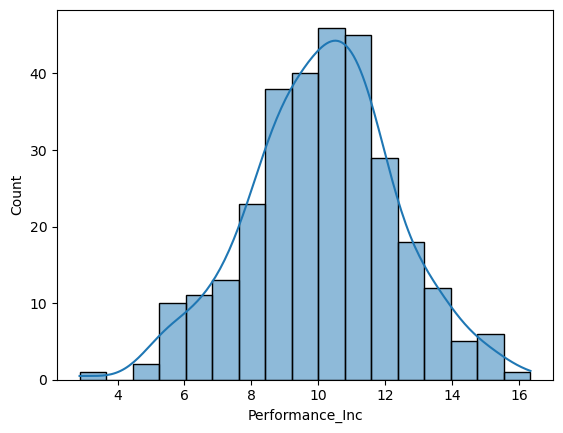

In [282]:
sns.histplot(df_athletic['Performance_Inc'], kde=True);

## Standard Score

* standardized measure between a sample statistic (i.e. mean) and a hypothesized statistic
* In units of standard deviations

1. Mean of sample statistic
2. Hypothesized mean
3. Standard Error of population (derived from bootstrap distribution

In [283]:
perf_mean = df_athletic['Performance_Inc'].mean()
perf_std = np.std(df_athletic['Performance_Inc'], ddof=1)
hyp_perf_mean = 9.35 # hypothesized mean

boot_perf_means = []
n_resamples = 1000
for i in range(n_resamples):
    boot_perf_means.append(
        np.mean(df_athletic['Performance_Inc'].sample(frac=1, replace=True))
    )

# standard error of the sampling distribution
st_err = np.std(boot_perf_means, ddof=1)

# Difference measure in terms of standard deviations
standard_score = (perf_mean - hyp_perf_mean) / st_err
# z_score = (sample_proportion - null_hypothesis_proportion) / standard_error


print(f'Performance Mean: {perf_mean}')
print(f'Performance STD: {perf_std}')
print(f'Hypothesized Performance Mean: {hyp_perf_mean}')
print(f'Standard Error (Sampling Distribution): {st_err}')
print(f'Standard Score (Z-Score): {standard_score}')

Performance Mean: 10.12432281713127
Performance STD: 2.1822650261475007
Hypothesized Performance Mean: 9.35
Standard Error (Sampling Distribution): 0.12926702724791667
Standard Score (Z-Score): 5.990103072813954


## Hypothesis Tests

* A hypothesis is a statement about a population parameter. We don't know the true value of this population parameter; we can only make inferences about it from the data.
* Hypothesis tests compare two competing hypotheses
    * H-O: null hypothesis, representing the existing idea
    * H-A: representing the challenging idea
    * The hypothesis testing equivalent of "beyond a reasonable doubt" is known as the **significance level**

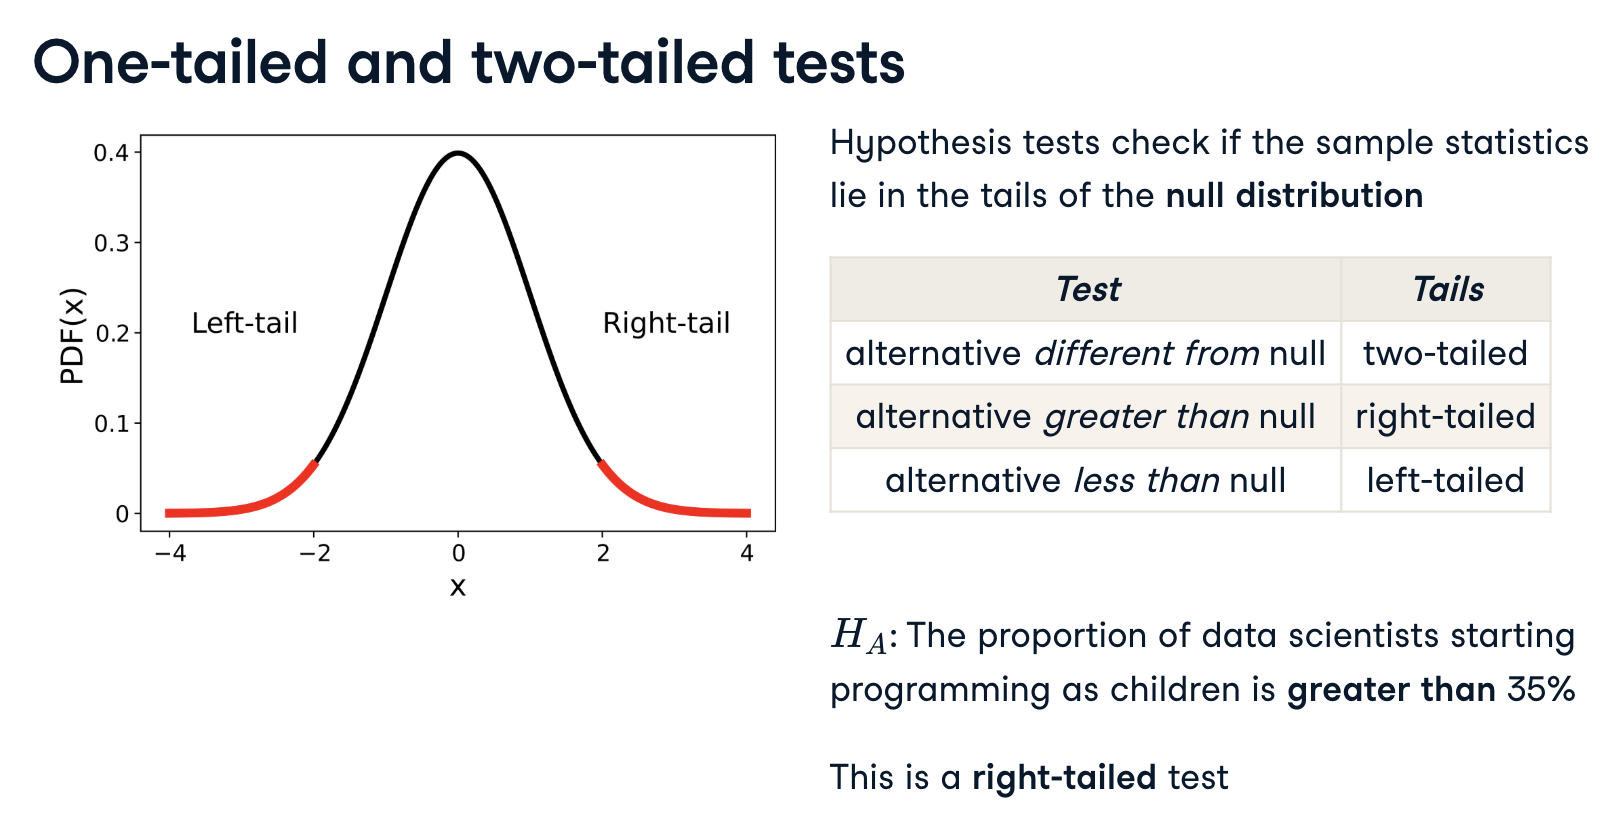

**Notes:**
* PDF = curve shape of probability distribution.
* Height (f(x)) = relative likelihood at x.
* Area under curve = actual probability.

---

## Hypothesis Test Example: p-values

* Test Type: 1 sample z-test (assumes normal distribution)
    * 1 distribution compared to a static hypothesized mean
* H-O: The mean performance measure of the group is 9.35
* H-A: The mean performance measure of the group is greater than 9.35

In [284]:
perf_mean = df_athletic['Performance_Inc'].mean()
perf_std = np.std(df_athletic['Performance_Inc'], ddof=1)
hyp_perf_mean = 9.35 # hypothesized mean
n = df_athletic.shape[0]

boot_perf_means = []
n_resamples = 1000
for i in range(n_resamples):
    boot_perf_means.append(
        np.mean(df_athletic['Performance_Inc'].sample(frac=1, replace=True))
    )

# standard error of the sampling distribution
st_err = np.std(boot_perf_means, ddof=1)
# st_err = perf_std / np.sqrt(n)

# Difference measure in terms of standard deviations
standard_score = (perf_mean - hyp_perf_mean) / st_err
# z_score = (sample_proportion - null_hypothesis_proportion) / standard_error

# p-value calcuation
    # norm.cdf() gives probability (area under curve) to the left of pdf curve
p_value = 1 - norm.cdf(standard_score) # right-tail test
# p_value = norm.cdf(standard_score) # left-tail test

print(f'Performance Mean: {perf_mean}')
print(f'Performance STD: {perf_std}')
print(f'Hypothesized Performance Mean: {hyp_perf_mean}')
print(f'Standard Error (Sampling Distribution): {st_err}')
print(f'Standard Score (Z-Score): {standard_score}')
print(f'p-value: {p_value}')

Performance Mean: 10.12432281713127
Performance STD: 2.1822650261475007
Hypothesized Performance Mean: 9.35
Standard Error (Sampling Distribution): 0.1281538744033875
Standard Score (Z-Score): 6.042133495659677
p-value: 7.604477048062108e-10


---

**Interpretation:**
* A p-value is the probability of the testing procedure producing an outcome (z-score) as extreme or more extreme than the one observed, assuming the null hypothesis to be true

* Assuming the null hypothesis is true (that the true mean performance is 9.35),
the probability of observing a z-score of 6.28 or higher is extremely small

* This provides strong evidence against the null hypothesis, supporting the conclusion that
the true mean performance is greater than 9.35.


In [285]:
# 95% confidence interval
lower = np.quantile(boot_perf_means, 0.025)
upper = np.quantile(boot_perf_means, 0.975)

print(lower, upper)

9.865989268575001 10.375110248546276


The 95% confidence interval of the bootsrap distribution is also greater than 9.35, this aligns with the observed data and the resulting z-score and p-value

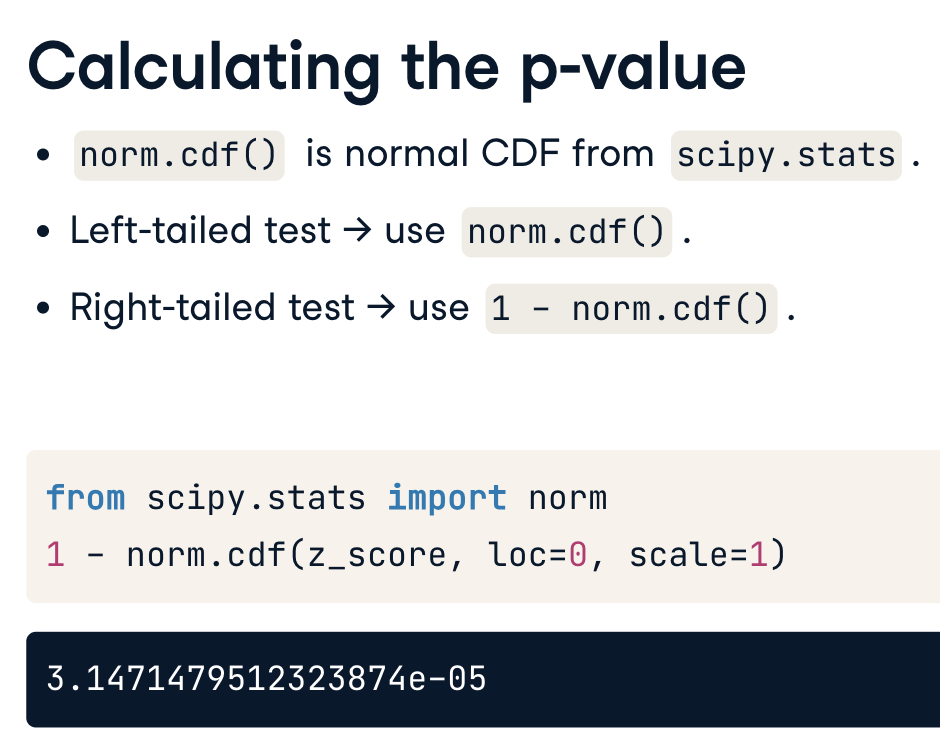

## Probability Density Function (PDF) and Cumulative Density Function (CDF)

| Function                  | Meaning                              | Returns                        | Use Case                                      |
| ------------------------- | ------------------------------------ | ------------------------------ | --------------------------------------------- |
| `norm.pdf(x, loc, scale)` | **Probability Density Function**     | Height of the curve at `x`     | How likely (relatively) a value is around `x` |
| `norm.cdf(x, loc, scale)` | **Cumulative Distribution Function** | Area under the curve up to `x` | Probability that the variable ≤ `x`           |

In [286]:
from scipy.stats import norm

# Define a standard normal distribution (mean=0, std=1)
mu = 0 # mean
sigma = 1 # std

# Example point
x = 1.0

# PDF: density (height of the curve)
pdf_value = norm.pdf(x, loc=mu, scale=sigma)

# CDF: cumulative probability up to x
cdf_value = norm.cdf(x, loc=mu, scale=sigma) # probability of observing value <= x

print(f"x = {x}")
print(f"PDF (height at x): {pdf_value:.4f}")
print(f"CDF (P(X ≤ x)): {cdf_value:.4f}")

x = 1.0
PDF (height at x): 0.2420
CDF (P(X ≤ x)): 0.8413


| Concept               | Explanation                                                                              |
| --------------------- | ---------------------------------------------------------------------------------------- |
| `norm.pdf(1)` → 0.242 | The **height** of the bell curve at x = 1 — not a probability, just density.             |
| `norm.cdf(1)` → 0.841 | The **area under the curve** to the left of x = 1 — meaning **84.1%** of values are ≤ 1. |


## Manual PDF and CDF

In [287]:
import numpy as np
from math import sqrt, pi, exp, erf

# Parameters
mu = 0
sigma = 1
x = 1.0

# === 1️⃣ Manual PDF Calculation ===
# Formula: (1 / sqrt(2πσ²)) * exp(-(x - μ)² / (2σ²))
pdf_manual = (1 / (sqrt(2 * pi * sigma**2))) * exp(-((x - mu)**2) / (2 * sigma**2))

# === 2️⃣ Manual CDF Calculation ===
# Formula (using error function): 0.5 * [1 + erf((x - μ) / (σ√2))]
cdf_manual = 0.5 * (1 + erf((x - mu) / (sigma * sqrt(2))))

print(f"Manual PDF at x={x}: {pdf_manual:.6f}")
print(f"Manual CDF at x={x}: {cdf_manual:.6f}")

Manual PDF at x=1.0: 0.241971
Manual CDF at x=1.0: 0.841345


---

## Significance Level

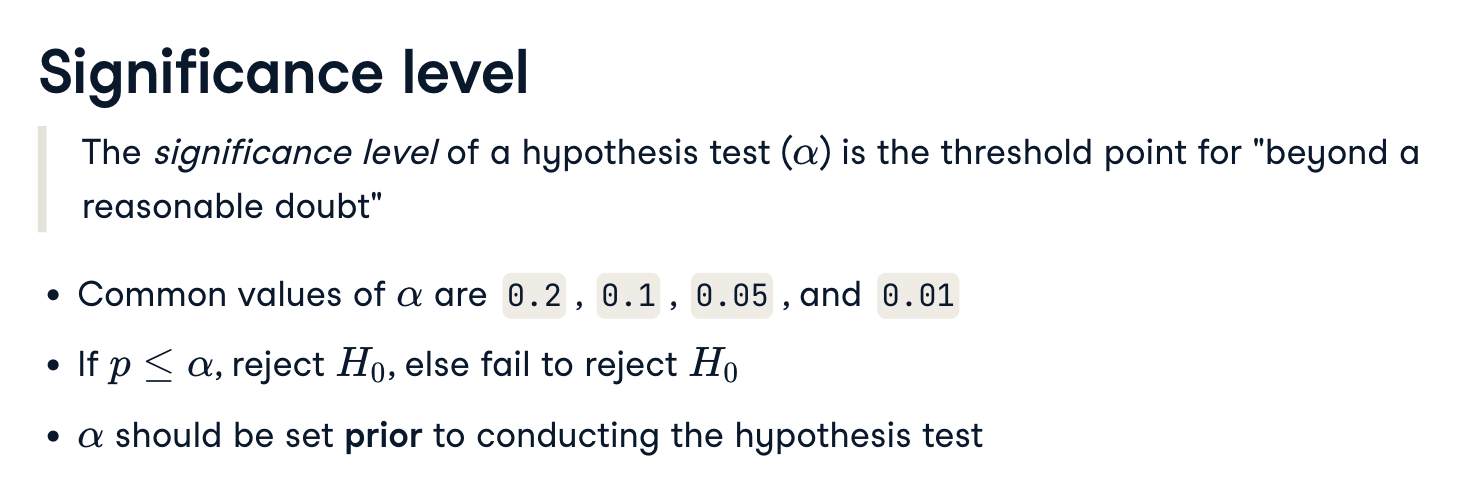

| Test Type      | Tail Direction | How α is Split    | Critical Region(s)        |
| -------------- | -------------- | ----------------- | ------------------------- | 
| **One-tailed** | Right or left  | All α in one tail | Only one extreme end      | 
| **Two-tailed** | Both sides     | α/2 in each tail  | Both ends of distribution |

* H-O: The mean performance measure of the group is 9.35
* H-A: The mean performance measure of the group is greater than 9.35

In [288]:
# p-value calcuation
    # norm.cdf() gives probability (area under curve) to the left of pdf curve
alpha = 0.05
p_value = 1 - norm.cdf(standard_score) # right-tail test
# p_value = norm.cdf(standard_score) # left-tail test


print(f'Performance Mean: {perf_mean}')
print(f'Performance STD: {perf_std}')
print(f'Hypothesized Performance Mean: {hyp_perf_mean}')
print(f'Standard Error (Sampling Distribution): {st_err}')
print(f'Standard Score (Z-Score): {standard_score}')
print(f'p-value: {p_value}')
print(f'Decision to reject H-O: {p_value < alpha}')

Performance Mean: 10.12432281713127
Performance STD: 2.1822650261475007
Hypothesized Performance Mean: 9.35
Standard Error (Sampling Distribution): 0.1281538744033875
Standard Score (Z-Score): 6.042133495659677
p-value: 7.604477048062108e-10
Decision to reject H-O: True


---

## Type I and Type II Errors

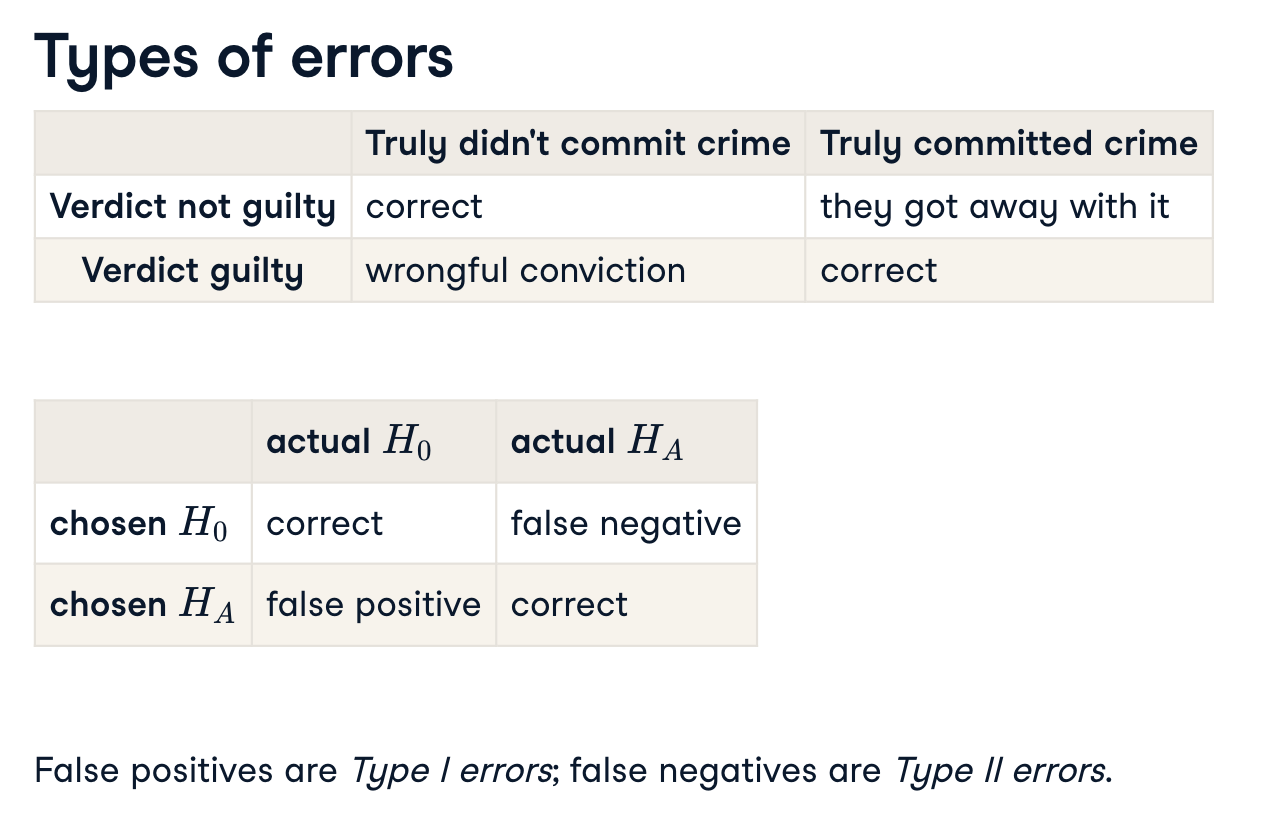

Error Scenarios:
* p-value <= alpha, we reject null hypothesis (H-O)
    * If H-O was actually true, this is a Type I Error (False Positive)

<br>

* p-value > alpha, fail to reject null hypothesis (H-A)
    * If H-A was actually true, this is Type II Error (False Negative)

| Concept       | What It Represents                                                                                          | Fixed or Data-Dependent?              |
| ------------- | ----------------------------------------------------------------------------------------------------------- | ------------------------------------- |
| **α (alpha)** | The *probability of a Type I error* — rejecting (H_0) when it’s actually true.                              | ✅ Fixed before the test (e.g., 0.05). |
| **p-value**   | The *probability of observing data as extreme as (or more extreme than)* what you got **if (H_0) is true**. | 🔄 Computed from your sample.         |

### 1 Sample (t-test): Manual

In [289]:
# 1 sample t-test manual
import numpy as np
from scipy.stats import t

# Parameters
alpha = 0.05                      # significance level
hyp_perf_mean = 9.35              # H0 mean
data = df_athletic['Performance_Inc'].dropna()

# Descriptive stats
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
n = len(data)

# --- Manual t-statistic ---
# t = (x̄ - μ₀) / (s / √n)
standard_error = sample_std / np.sqrt(n)
t_stat = (sample_mean - hyp_perf_mean) / standard_error

# --- Manual p-value (right-tailed) ---
# p = 1 - CDF(t)
p_one_tailed = 1 - t.cdf(t_stat, df=n-1)

# Decision rule
reject_null = p_one_tailed < alpha

# --- Output ---
print(f"Sample Size: {n}")
print(f"Sample Mean: {sample_mean:.4f}")
print(f"Sample STD: {sample_std:.4f}")
print(f"Standard Error: {standard_error:.4f}")
print(f"T-Statistic: {t_stat:.4f}")
print(f"One-Tailed p-value: {p_one_tailed:.3e}")
print(f"Significance Level (alpha): {alpha}")
print(f"Reject H₀? {'Yes ✅' if reject_null else 'No ❌'}")

Sample Size: 300
Sample Mean: 10.1243
Sample STD: 2.1823
Standard Error: 0.1260
T-Statistic: 6.1458
One-Tailed p-value: 1.269e-09
Significance Level (alpha): 0.05
Reject H₀? Yes ✅


### 1 Sample (t-test): `scipy.stats`

In [290]:
# # 1 sample ttest using scipy
# import numpy as np
# from scipy import stats

# # Parameters
# alpha = 0.05                      # significance level
# hyp_perf_mean = 9.35              # H0 mean
# data = df_athletic['Performance_Inc'].dropna()

# # Run one-sample t-test (two-tailed by default)
# t_stat, p_two_tailed = stats.ttest_1samp(data, popmean=hyp_perf_mean)

# # Convert to one-tailed p-value (for HA: mean > 9.35)
# if t_stat > 0:
#     p_one_tailed = p_two_tailed / 2
# else:
#     p_one_tailed = 1 - (p_two_tailed / 2)

# # Decision rule
# reject_null = p_one_tailed < alpha

# # Print results
# print(f"Sample Mean: {data.mean():.4f}")
# print(f"Hypothesized Mean: {hyp_perf_mean}")
# print(f"T-Statistic: {t_stat:.4f}")
# print(f"One-Tailed p-value: {p_one_tailed:.3e}")
# print(f"Significance Level (alpha): {alpha}")
# print(f"Reject H₀? {'Yes ✅' if reject_null else 'No ❌'}")

---

# 2 Sample t-tests

## Testing Procedure: 
1. Setting out of the hypothesis
2. Summarise and visualisation of the data
3. Assessment of assumptions
4. Implementation of the statistical test
5. Interpreting the output and presentation of results

In [291]:
stack_overflow = pd.read_feather('data/stack_overflow.feather')

In [295]:
stack_overflow.groupby(['age_first_code_cut'])['converted_comp'].mean()

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

In [345]:
adult = stack_overflow.loc[stack_overflow['age_first_code_cut']=='adult', 'converted_comp'].dropna().values.round(2)
child = stack_overflow.loc[stack_overflow['age_first_code_cut']=='child', 'converted_comp'].dropna().values.round(2)

adult_salary_mean = stack_overflow[stack_overflow['age_first_code_cut'] == 'adult']['converted_comp'].mean().round(2)
child_salary_mean = stack_overflow[stack_overflow['age_first_code_cut'] == 'child']['converted_comp'].mean().round(2)

print(adult_salary_mean)
print(child_salary_mean)

111313.31
132419.57


In [350]:
pd.DataFrame(adult).describe().round()

0
count     1376.0
mean    111313.0
std     271547.0
min          0.0
25%      20942.0
50%      50621.0
75%      90000.0
max    2000000.0

In [351]:
pd.DataFrame(child).describe().round()

0
count      885.0
mean    132420.0
std     255585.0
min          0.0
25%      38916.0
50%      70264.0
75%     120000.0
max    2000000.0

## 2 Sample Hypothesis Test
* HO: null hypothesis, the salary of people that started programming as children = the salary of people that started programming as adults
* HA: alternative hypothesis, the salary of people that started programming as children != the salary of people that started programming as adults

## Student's t-test Assumptions

In order to use a Student’s t-test (and for the results to be strictly valid) we have to make three assumptions:

1. Samples distributions are normally distributed (assumed with large sample sizes)
3. Each data point in the samples is independent of the others (assumed)
4. The parent distributions should have the same variance (needs validation)

In [355]:
# checking normality assumption to descie which variance test to use
# Shapiro Wilke's normality test
    # HO: sample taken from normal distribution
    # HA: sample taken from non-normal distribution
pg.normality(stack_overflow, dv='converted_comp', group='age_first_code_cut')
# pg.normality(adult) # single series

W          pval  normal
age_first_code_cut                                
adult               0.333722  4.321273e-57   False
child               0.394889  3.818034e-47   False

Interpretation: p-value suggests samples are taken from non-normal distribution

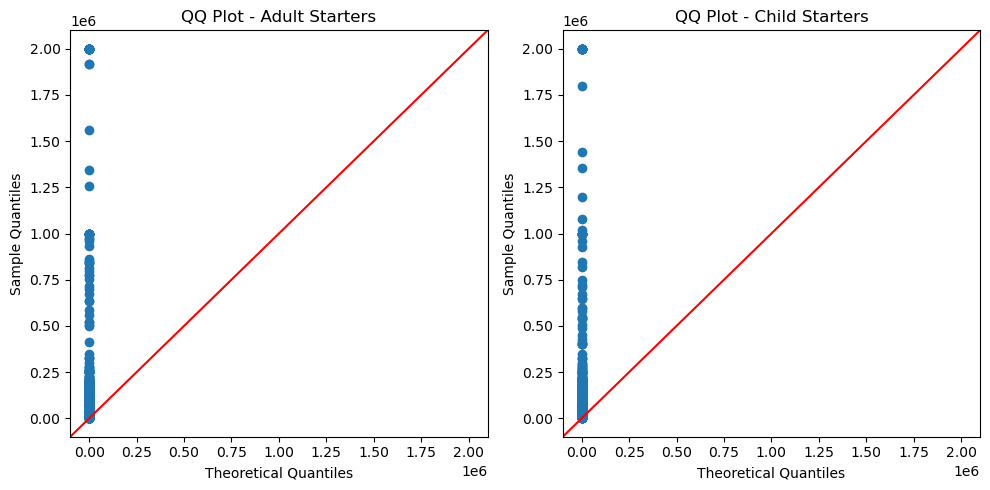

In [360]:
# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# QQ-plot for adults
sm.qqplot(adult, line='45', ax=axes[0])
axes[0].set_title('QQ Plot - Adult Starters')

# QQ-plot for children
sm.qqplot(child, line='45', ax=axes[1])
axes[1].set_title('QQ Plot - Child Starters')

plt.tight_layout()
plt.show()

## Testing for Equal Variance

In [363]:
# # from scipy.stats import levene -> for non-normal data (our cases)
# from scipy.stats import levene
# stat, p = levene(adult, child)
# print(f"Levene’s p-value: {p:.3f}")
pg.homoscedasticity(dv = "converted_comp",
                    group = "age_first_code_cut",
                    method = "levene",
                    data = stack_overflow)


# # from scipy.stats import bartlett -> normally distributed data
# stat, p = bartlett(adult, child)
# print(f"Bartlett’s p-value: {p:.3f}")

W      pval  equal_var
levene  0.242312  0.622589       True

Interpretation: equal variance => pooled t-test
* p < 0.05 → variances not equal → use Welch’s t-test
* p ≥ 0.05 → variances equal → pooled t-test is fine

In [389]:
t_stat, p_value = stats.ttest_ind(adult, child, equal_var=True)

alpha = 0.05  # significance level
reject_null = p_value < alpha

print(f"T-statistic: {t_stat:.4f}")
print(f"p-value: {p_value}")
print(f"Significance Level (alpha): {alpha}")
print(f"Reject H₀? {'Yes ✅' if reject_null else 'No ❌'}")

T-statistic: -1.8455
p-value: 0.06509401769037157
Significance Level (alpha): 0.05
Reject H₀? No ❌


## Implement and Interpret the t-test
* normal data: Student's t-test
    * Equal variance: pooled t-test
    * Unequal variance: use Welch's separate variance t-test
* non-normal data: Mann-Whitney U test

In [377]:
# student's t-test using pingouin (assuming equal variance)
    # just checking (our data is skewed, not normally distributed)
pg.ttest(adult, child,
         correction = False).transpose() # correction=True => corrects of unequal variance using Welch t-test

T-test
T                       -1.845511
dof                          2259
alternative             two-sided
p-val                    0.065094
CI95%        [-43533.48, 1320.96]
cohen-d                  0.079522
BF10                        0.263
power                    0.454199

---

**Interpretation:**

* HO is that the means are the same. Therefore a `p-value` of 0.065 (> 0.05 significance level) indicates that there 6.5% probability of observing data as extreme or more, assuming the null hypothesis is true
* Given our arbitrary decision threshold (alpha = 0.05), `we conservatively conclude there isn't sufficient evidence to refute the claim that the mean salaries of the 2 groups are the same`
* While the mean differences salary in our sample our different (132k vs 11k), with a std of 27k there is significant variability across observations
* `The 95% CI for the difference in means is (-43k, 1k) suggesting that it's likely that the developers that coded as adults' salary would likely be lower in similar experiments`, the interval does cross the zero line so it's plausible that the difference is due to our sample

---

### Non-Normal Data (Mann-Whitney U Test)

* Hypothesis Test:
    * HO: The difference in median between the two groups is 0 (medians are the same
    * HA: The difference between the two groups is not 0 (medians are different)
* Doesn't assume that the parent distributions are normally distributed
* Assumes that both data have the same shape and variance

In [403]:
# Mann-Whitney test for non-normal data (OUR CASE)
pg.mwu(adult, child)

# # Mann–Whitney test
# from scipy.stats import mannwhitneyu
# stat, p_value = mannwhitneyu(adult, child, alternative='two-sided')
# print(f"Mann–Whitney U: {stat:.2f}, p-value: {p_value:.4f}")

U-val alternative         p-val       RBC      CLES
MWU  473394.5   two-sided  3.805447e-19 -0.222516  0.388742

### Parameters

* RBC (`Rank-Biserial Correlation`): RBC represents the correlation between group membership and ranks. `It quantifies how often one group’s values tend to be higher or lower than the other’s`
    * +1: All values in group A are higher than all values in group B
    * 0: Groups are completely overlapping (no difference)
    * −1: All values in group A are lower than all values in group B
    * `small (not strong)negative effect, meaning adults’ salaries tend to be lower than those of people who started coding as children`

<br>

* CLES `(Common Language Effect Size)` = (RBC + 1)
    * `There’s a 39% probability that a randomly chosen adult starter earns more than a randomly chosen child starter`

**Interpretation:**

* The very small p-value indicates that the probability of observing our data or something more extreme is extremely low, suggesting we can more confidently infer the medians of the 2 groups are in fact different
* We see that the median salary for those that coded earlier as children is 20k higher (40%) vs those coding as adults
* While the mean difference p-value was slightly higher than our confidence level of 0.05, using a test that is robust to non-normal data, the p-value is significantly lower than the decison threshold

## 2 Sample t-test (Manual)

In [632]:
# manually implement 2 sample t-test
import numpy as np
from scipy.stats import t

alpha = 0.05  # two-tailed

# --- Split data ---
adult = stack_overflow.loc[stack_overflow['age_first_code_cut']=='adult', 'converted_comp'].dropna().values
child = stack_overflow.loc[stack_overflow['age_first_code_cut']=='child', 'converted_comp'].dropna().values

# --- Descriptives ---
n1, n2 = len(adult), len(child)
m1, m2 = adult.mean(), child.mean()
s1, s2 = adult.std(ddof=1), child.std(ddof=1)

# Equal-variance (pooled) two-sample t-test (if variances equal)
var_pooled = ((n1-1)*s1**2 + (n2-1)*s2**2) / (n1 + n2 - 2) # pooled variance, df = n1 + n2 - 2
se_pooled = np.sqrt(var_pooled * (1/n1 + 1/n2)) # t-test of equal variances
# se_pooled_unequal = np.sqrt((s1**2 / n1) + (s2**2 / n2)) # corrseponds to Welch t-test of unqual variances
t_pooled = (m1 - m2) / se_pooled
df_pooled = n1 + n2 - 2

# confidence interval calculation
tcrit = t.ppf(0.975, df=df_pooled)  # 95% two-sided
diff = m1 - m2               # adult - child
CI_low  = diff - tcrit * se_pooled
CI_high = diff + tcrit * se_pooled

# p-value calculation
p_two_pooled = 2 * (1 - t.cdf(abs(t_pooled), df=df_pooled))
reject_pooled = p_two_pooled < alpha

print("\n=== Pooled two-sample t-test (equal variances) ===")
print(f"Pooled var={var_pooled:.4f}, SE (pooled)={se_pooled:.4f}")
print(f"t-stat={t_pooled:.4f}, df={df_pooled}")
print(f"p-value (two-tailed)={p_two_pooled}")
print(f"95% Confidence Interval: {CI_low:.2f}, {CI_high:.2f}")
print(f"Reject H0 at alpha={alpha}? {'Yes ✅' if reject_pooled else 'No ❌'}")


=== Pooled two-sample t-test (equal variances) ===
Pooled var=70445034723.4740, SE (pooled)=11287.1843
t-stat=-1.8699, df=2259
p-value (two-tailed)=0.06162260433031541
95% Confidence Interval: -43240.59, 1028.07
Reject H0 at alpha=0.05? No ❌


## 95% Confidence Interval (Bootstrap)

In [401]:
# Convert to numpy arrays
adult = stack_overflow.loc[stack_overflow['age_first_code_cut']=='adult', 'converted_comp'].dropna().values
child = stack_overflow.loc[stack_overflow['age_first_code_cut']=='child', 'converted_comp'].dropna().values

# --- Bootstrap parameters ---
n_boot = 5000
rng = np.random.default_rng(42)  # reproducible

boot_diffs = []
for _ in range(n_boot):
    boot_adult = rng.choice(adult, size=len(adult), replace=True)
    boot_child = rng.choice(child, size=len(child), replace=True)
    boot_diffs.append(np.mean(boot_adult) - np.mean(boot_child))

boot_diffs = np.array(boot_diffs)

# --- Compute 95% CI using percentiles ---
CI_lower = np.percentile(boot_diffs, 2.5)
CI_upper = np.percentile(boot_diffs, 97.5)

# --- Results ---
mean_diff = np.mean(adult) - np.mean(child)
print(f"Bootstrap Mean Difference: {mean_diff:,.2f}")
print(f"95% Bootstrap CI: [{CI_lower:,.2f}, {CI_upper:,.2f}]")

Bootstrap Mean Difference: -21,106.26
95% Bootstrap CI: [-43,859.97, 785.67]


---

## Paired t-test

* This means that the same group undergoes each condition, and the group is therefore compared to itself

<br>

* HO: There is no difference in cortisol level between times
    * Evening Cortisol = Morning Cortisol for all participants
* HA: There is a difference in cortisol levels between times
    * Evening Cortisol != Morning Cortisol for all participants

In [404]:
# # paired t-test example
# pg.ttest(cortisol_diff_py["evening"],
#          cortisol_diff_py["morning"],
#          alternative = "two-sided",
#          paired = True).transpose()


# # use Wilcoxan Rank if data is non-normal
# pg.wilcoxon(x = cortisol_diff_py["evening"],
#             y = cortisol_diff_py["morning"],
#             alternative = "two-sided",
#             correction = True)

---

## Non-Parametric Test Summary

| **Type of Analysis**                  | **Parametric Test**        | **Non-Parametric Test**                           |
|--------------------------------------|-----------------------------|---------------------------------------------------|
| Comparing two independent groups     | Student’s t-test            | Mann–Whitney U test (aka Wilcoxon rank-sum test)  |
| Comparing paired samples             | Paired t-test               | Wilcoxon signed-rank test                         |
| Comparing 3+ groups                  | One-way ANOVA               | Kruskal–Wallis test                               |
| Correlation                          | Pearson’s r                 | Spearman’s ρ (rho)                                |
| Testing frequency distributions      | N/A                         | Chi-square test                                   |

---

# ANOVA Tests 

**Learning Objectives:**
1. ANOVA Hypothesis Test
2. ANalyze the Data
3. Assumptions
4. Understanding the Output
5. Post-Hoc Analysis Methods
6. Handling Non-Normal Data

**Definition:**
* We have three or more groups of continuous data
* It is used to find out if the samples came from parent distributions with the same mean

<br>

**Hypothesis Test:**
* HO: The mean feeding rates at all three sites is the same 
* HA: The mean feeding rates are not all equal

## Assumptions 

1. The parent distributions from which the samples are taken are normally distributed
2. Each data point in the samples is independent of the others
3. The parent distributions should have the same variance

In [ ]:
# load the data
oystercatcher_py = pd.read_csv("data/CS2-oystercatcher-feeding.csv")

# and have a look
oystercatcher_py.head()

site    feeding
0  exposed  12.175506
1  exposed  13.073917
2  exposed  17.939687
3  exposed  13.891783
4  exposed  14.051663

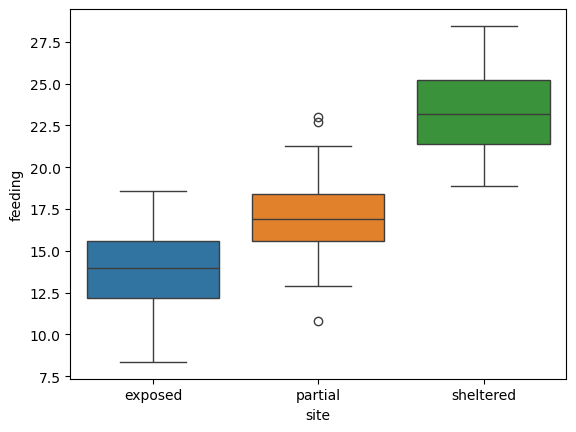

In [429]:
sns.boxplot(data=oystercatcher_py, x="site", y="feeding", hue="site");

### Normality

In [439]:
# test for normality 
    # checking each level individually
pg.normality(dv = "feeding",
             group = "site",
             data = oystercatcher_py)

W      pval  normal
site                                 
exposed    0.988586  0.953033    True
partial    0.987907  0.939829    True
sheltered  0.975106  0.513551    True

In [441]:
# test for normality
    # checking combined residuals
# create a linear model
model = smf.ols(formula= "feeding ~ C(site)", data = oystercatcher_py)
# and get the fitted parameters of the model
lm_model = model.fit()

In [442]:
lm_model.resid

0     -1.647392
1     -0.748981
2      4.116788
3      0.068884
4      0.228764
         ...   
115   -0.403216
116    1.545003
117   -0.615837
118    2.501305
119   -0.620785
Length: 120, dtype: float64

In [443]:
# get the residuals from the model fit
# and perform Shapiro-Wilk test
pg.normality(lm_model.resid)

W     pval  normal
0  0.993546  0.85707    True

### Equality of Variance

In [445]:
pg.homoscedasticity(dv = "feeding",
                    group = "site",
                    method = "bartlett", # bartlett for normal data, levene for non-normal data
                    data = oystercatcher_py)

T      pval  equal_var
bartlett  0.295983  0.862439       True

## Implement Test

* `This creates a linear model based on the data`
* Finds the means of the three groups and calculates a load of intermediary data that we need for the statistical analysis.

**Params:**
* dv: dependent variable (response variable; in our case feeding)
* between: between-subject factor (predictor variable; in our case site)
* data: dataframe
* detailed: optional True or False, we’re setting it to True because we like to know what we’re doing!

In [447]:
pg.anova(dv = "feeding",
         between = "site",
         data = oystercatcher_py,
         detailed = True)

Source           SS   DF          MS           F         p-unc       np2
0    site  1878.015371    2  939.007685  150.782449  4.128088e-33  0.720473
1  Within   728.625249  117    6.227566         NaN           NaN       NaN

In [449]:
sm.stats.anova_lm(lm_model)

df       sum_sq     mean_sq           F        PR(>F)
C(site)     2.0  1878.015371  939.007685  150.782449  4.128088e-33
Residual  117.0   728.625249    6.227566         NaN           NaN

**ANOVA Output:**

* Source: Factor names - in our case these are the different sites (site)
* SS: Sums of squares (we’ll get to that in a bit)
* DF: Degrees of freedom (at the moment only used for reporting) (n-1)
* MS: Mean squares
* F: Our F-statistic
* p-unc: p-value (unc stands for “uncorrected” - more on multiple testing correction later)
* np2: Partial eta-square effect sizes (more on this later)

**Interpretation:**
* extremenly low p-value suggests that there is sufficient evidence to reject the null hypothesis that all the means are equal
* Indicates at least 2 sites have differing means

<br>

**Next Steps:** 
* Perform pairwise tests to determine which means differ

---

## Post-Hoc Analysis (Pairwise t-tests)

* We use post-hoc testing to check for significant differences between the group means, for example using `Tukey’s range test`

In [754]:
# Tukey Range Test, used specifically for pairwise mean comparisons
# Tukey Assumptions 
    # 1. Normality of distributions
    # 2. Equality of variance between groups
    # 3.Independence of observations

pg.pairwise_tukey(dv = "feeding",
                  between = "site",
                  data = oystercatcher_py).transpose()

# # pairwise tests with multiple correction types
# pg.pairwise_tests(data = oystercatcher_py,
#                   between="site",
#                   dv="feeding",
#                   padjust='holm').T

0          1          2
A          exposed    exposed    partial
B          partial  sheltered  sheltered
mean(A)  13.822899  13.822899  17.081666
mean(B)  17.081666  23.355503  23.355503
diff     -3.258767  -9.532605  -6.273838
se        0.558013   0.558013   0.558013
T         -5.83995 -17.083128 -11.243178
p-tukey        0.0        0.0        0.0
hedges   -1.274364  -3.883563  -2.463793

## Dunnett's Correction for A/B/n Test

* Dunnett’s test compares the means of multiple experimental groups against a single control group.
* Tukey’s Honestly Significant Difference Test is another multiple-comparison test that controls the family-wise error rate, but tukey_hsd performs all pairwise comparisons between groups.
* When pairwise comparisons between experimental groups are not needed, Dunnett’s test is preferable due to its higher power.

In [487]:
sheltered = oystercatcher_py[oystercatcher_py['site'] == 'sheltered']['feeding'].values
partial = oystercatcher_py[oystercatcher_py['site'] == 'partial']['feeding'].values
exposed = oystercatcher_py[oystercatcher_py['site'] == 'exposed']['feeding'].values

print(np.mean(sheltered ))
print(np.mean(partial ))
print(np.mean(exposed ))

23.3555032709771
17.081665545572655
13.82289863176371


In [486]:
# For A/B/n comparisons Run Dunnett's test
# Compares all groups to a control, vs Tukey which compares all combinations of groups
from scipy.stats import dunnett

samples = [sheltered, partial]
control = exposed

dunnett_results = dunnett(*samples, 
              control=control, 
              alternative='greater')

dunnett_results

DunnettResult(statistic=array([17.08312825,  5.83994986]), pvalue=array([0.0000000e+00, 4.8565733e-08]))

| Comparison               | Null Hypothesis ($H_0$)             | Alternative Hypothesis ($H_A$)      |
| ------------------------ | ----------------------------------- | ----------------------------------- |
| **Sheltered vs Exposed** | $H_0$: μ_{sheltered} ≤ μ_{exposed}$ | $H_A$: μ_{sheltered} > μ_{exposed}$ |
| **Partial vs Exposed**   | $H_0$: μ_{partial} ≤ μ_{exposed}$   | $H_A$: μ_{partial} > μ_{exposed}$   |


**Interpretation:**
* Compared each group to control, null hypothesis is that group < control and HA is that group > control
* Small p-values suggest that we can reject the null hypothesis that group means are less than the control, meaning the means are statistically greater

---

# P-Value Adjustments
* Recommended in A/B/n and Post-Hoc Pairwise Tests

## Recommendation: Use Dunnett's Correction for A/B/n tests (best procedure to control FWER)

---

## 🎯 The Problem: Multiple Comparisons Inflate False Positives

Every time you perform a hypothesis test (like comparing two variants), there’s a chance — your **α (e.g., 0.05)** — of making a **Type I error**, i.e., falsely rejecting the null hypothesis when it’s actually true.  

When you run **multiple tests**, those errors **compound**.

### 📊 Example

If you run:
- One test → 5% chance of a false positive  
- Ten independent tests →  

  $$
  P(\text{at least one false positive}) = 1 - (1 - 0.05)^{10} = 0.40
  $$

That’s a **40% chance** of getting *at least one* significant result purely by luck.

In an **A/B/n test** (e.g., A/B/C/D), comparing all variants pairwise creates **multiple tests**, which inflates your overall (family-wise) error rate.

---

## ⚖️ The Solution: P-Value Adjustments

To control this inflation, we use **p-value adjustments** (or equivalently, adjust the significance threshold).  
These methods ensure your overall error rate stays near your chosen α (usually 0.05).

---

## 🧩 Common Adjustment Methods

| **Method** | **Idea** | **Effect** |
|-------------|-----------|-------------|
| **Bonferroni correction** | Divide α by number of comparisons ($\alpha' = \alpha / m$) | Very conservative; reduces false positives but increases false negatives |
| **Holm–Bonferroni** | Sequentially adjusts α; less conservative | More statistical power |
| **Tukey’s HSD** | Built-in ANOVA post-hoc correction | Ideal for pairwise mean comparisons |
| **False Discovery Rate (Benjamini–Hochberg)** | Controls expected proportion of false positives | Balances Type I and Type II errors — ideal for large experiments |

---

## 🧠 In the Context of A/B/n Testing

1. **ANOVA test:**  
   Checks if *any difference* exists among variants (A/B/n).

2. **Post-hoc pairwise tests:**  
   If ANOVA is significant, you run pairwise tests (e.g., A vs B, A vs C) to find *where* the difference lies.

3. **The problem:**  
   Each pairwise test increases your chance of false positives.

4. **The solution:**  
   Apply a **p-value adjustment** to maintain the overall error rate at your desired α level (e.g., 0.05).

---

## ✅ Summary

> **P-value adjustments** in A/B/n and post-hoc tests prevent misleading “significant” results caused by chance when running multiple comparisons.  
> They ensure you don’t incorrectly declare a variant “better” just because you ran many tests.


---

## Adjustment Methods

| **Adjustment Method** | **How It Works** | **Use Case** | **Pros** | **Cons** |
|------------------------|------------------|---------------|-----------|-----------|
| **Bonferroni Correction** | Divide α by number of comparisons (α′ = α / m). | Small number of tests; strong control of Type I error. | Simple; very conservative. | Greatly increases Type II errors (misses real effects). |
| **Holm–Bonferroni** | Stepwise: sort p-values, compare each to α / (k − i + 1). | Moderate number of tests; preferred over Bonferroni. | More power; still controls family-wise error rate (FWER). | Slightly complex to compute. |
| **Šidák Correction** | Adjusted α′ = 1 − (1 − α)^(1 / m). | Similar to Bonferroni but assumes independence between tests. | Less conservative than Bonferroni. | Not valid if tests are correlated. |
| **Tukey’s HSD** | Uses studentized range distribution for all pairwise mean comparisons. | Post-hoc tests after ANOVA (A/B/n or multi-group means). | Controls FWER; interpretable for mean differences. | Requires equal variances and group sizes. |
| **Benjamini–Hochberg (FDR)** | Sort p-values; find largest p where p ≤ (i/m) × α. | Many tests (e.g., feature selection, A/B/n with many variants). | Controls expected proportion of false discoveries; more power. | Allows some false positives (controls FDR, not FWER). |
| **Benjamini–Yekutieli (FDR)** | Extension of BH; valid under correlated tests. | Correlated tests (e.g., gene expression, metrics overlap). | FDR control under dependence. | More conservative than BH. |
| **Holm–Šidák** | Combines Holm’s step-down approach with Šidák adjustment. | Moderate tests, independent comparisons. | Balanced control and power. | Slightly complex math, less common. |

---

## ANOVA (Non Normal Data)

In [427]:
stack_overflow.groupby(['job_sat'])['converted_comp'].mean()

/var/folders/q5/3c0wcv2n79jg6ctjb2hwph_m0000gn/T/ipykernel_55584/1059553815.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stack_overflow.groupby(['job_sat'])['converted_comp'].mean()


job_sat
Very dissatisfied        127539.679245
Slightly dissatisfied     96643.324561
Neither                  110593.980100
Slightly satisfied        96084.992647
Very satisfied           147281.484642
Name: converted_comp, dtype: float64

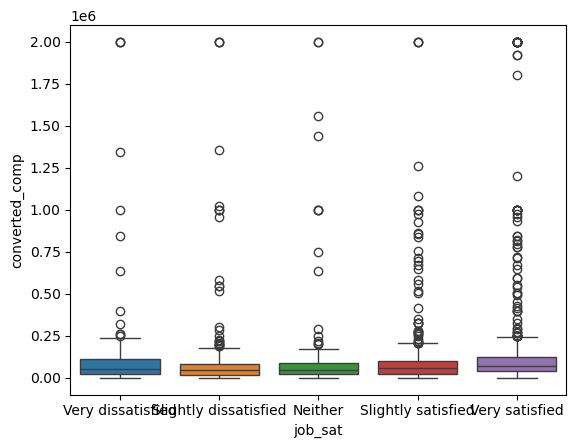

In [424]:
sns.boxplot(data=stack_overflow, x="job_sat", y="converted_comp", hue="job_sat");

In [410]:
# test for normality 
    # checking each level individually
pg.normality(dv = "converted_comp",
             group = "job_sat",
             data = stack_overflow)

W          pval  normal
job_sat                                              
Slightly satisfied     0.383005  6.896884e-43   False
Very satisfied         0.378876  1.990680e-47   False
Neither                0.342453  2.182143e-26   False
Very dissatisfied      0.358733  1.707140e-23   False
Slightly dissatisfied  0.330108  1.934874e-33   False

In [417]:
# test for normality
    # checking combined residuals
# create a linear model
model = smf.ols(formula= "converted_comp ~ C(job_sat)", data = stack_overflow)
# and get the fitted parameters of the model
lm_model = model.fit()

In [418]:
lm_model.resid

0      -1.852899e+04
1      -7.231148e+04
2       4.472575e+05
3       1.852719e+06
4      -1.094655e+05
            ...     
2256   -2.281485e+03
2257   -1.133095e+05
2258   -4.999748e+04
2259   -7.528148e+04
2260    3.271852e+04
Length: 2261, dtype: float64

In [419]:
# get the residuals from the model fit
# and perform Shapiro-Wilk test
pg.normality(lm_model.resid)

W          pval  normal
0  0.372265  1.844311e-66   False

### Equal Variance

In [421]:
pg.homoscedasticity(dv = "converted_comp",
                    group = "job_sat",
                    method = "levene", # levene for non-normal data
                    data = stack_overflow)

W      pval  equal_var
levene  2.814797  0.024034      False

## Kruskal-Wallis Test (Non Normal data)

* The Kruskal-Wallis one-way analysis of variance test is an analogue of ANOVA that can be used when the assumption of normality cannot be met
* In this way it is an extension of the Mann-Whitney test for two groups.
* HO: The median aggression rates for all types of familiarity are the same
* HA: The median aggression rates are not all equal

In [488]:
# interpret test
pg.kruskal(dv = "converted_comp",
           between = "job_sat",
           data = stack_overflow)

Source  ddof1          H         p-unc
Kruskal  job_sat      4  72.814939  5.772915e-15

Interpretation: 
* Since the p-value is very small (much smaller than the standard significance level of 0.05) we can say “that it is very unlikely that these three samples came from the same parent distribution and as such we can reject our null hypothesis

## Post-hoc (Non-Normal data): Dunn's Test

In [493]:
sp.posthoc_dunn(stack_overflow,
                val_col = "converted_comp",
                group_col = "job_sat", 
               p_adjust='holm').round(3)

Very dissatisfied  Slightly dissatisfied  Neither  \
Very dissatisfied                  1.000                  0.505    0.695   
Slightly dissatisfied              0.505                  1.000    1.000   
Neither                            0.695                  1.000    1.000   
Slightly satisfied                 1.000                  0.055    0.283   
Very satisfied                     0.003                  0.000    0.000   

                       Slightly satisfied  Very satisfied  
Very dissatisfied                   1.000           0.003  
Slightly dissatisfied               0.055           0.000  
Neither                             0.283           0.000  
Slightly satisfied                  1.000           0.000  
Very satisfied                      0.000           1.000

**Interpretation:** 
* returns p-values for each comparison
* p-value > 0.05 indicates the medians are not statistically different

---

# Proportion Tests

* **Overview:**
    * When working with **proportions**, you’re not comparing averages of continuous metrics — you’re comparing **probabilities of success** (e.g., the fraction of users who converted).
    * The focus is on **counting outcomes** rather than **measuring magnitudes**.

---

## Shift from Continuous to Proportions
| **Continuous Data** | **Proportional / Binary Data** |
|----------------------|--------------------------------|
| Measured on a scale (e.g., time, weight, spend, engagement minutes). | Outcome is categorical or binary (e.g., success/failure, click/no click). |
| Compare **means** between groups. | Compare **proportions** (probabilities of success) between groups. |
| Common tests: t-tests, ANOVA. | Common tests: z-tests for proportions, chi-square tests. |


## Key Proportions Tests in Practice

| **Test Name** | **What It Compares** | **Assumes Independence?** | **Typical Use Case** |
|----------------|----------------------|-----------------------------|------------------------|
| **One-sample proportion test** | Observed proportion vs expected proportion | Yes | “Is our 18% conversion significantly different from the industry standard 15%?” |
| **Two-sample proportion test** | Two independent group proportions | Yes | A/B test: Version A vs Version B. |
| **Chi-square test** | Proportions across ≥3 groups | Yes | A/B/n experiments or categorical segmentation. |
| **McNemar’s test** | Proportions before/after on same subjects | No (paired data) | Pre/post studies on same users (e.g., click behavior before vs after redesign). |

---

## Common Real-World Scenarios

| **Scenario** | **Data Type** | **Example Question** | **Test Type** | **When to Use** |
|---------------|---------------|------------------------|----------------|-----------------|
| **A/B test measuring conversion rate** | Binary (converted or not) | “Is the signup rate higher on Version B than Version A?” | **Two-proportion z-test** | When comparing two independent groups’ proportions (A/B). |
| **Email campaign with 3 subject lines** | Binary (opened or not) | “Do open rates differ across subject lines A, B, C?” | **Chi-square test of independence** or **prop.test (R)** | When comparing >2 groups (A/B/n). |
| **Click-through vs no-click** | Binary outcome | “Is the click rate significantly higher for mobile users vs desktop?” | **Two-proportion z-test** | Classic marketing and UX testing scenario. |
| **Before/After on same users (paired)** | Binary (success before vs after) | “Did the same users click more after redesign?” | **McNemar’s test** | For *paired proportions* (same subjects measured twice). |

---

## Load Conversion Data

In [568]:
customer_journey = pd.read_csv('data/customer_journey.csv')
customer_journey.head()

SessionID     UserID            Timestamp      PageType DeviceType  \
0  session_0  user_2223  2025-01-20 22:53:34          home    Desktop   
1  session_1  user_2192  2025-02-26 12:57:10          home     Tablet   
2  session_1  user_2192  2025-02-26 12:59:11  product_page     Tablet   
3  session_2  user_1708  2025-06-24 15:40:46          home     Mobile   
4  session_3  user_2976  2025-06-11 07:21:02          home     Tablet   

   Country ReferralSource  TimeOnPage_seconds  ItemsInCart  Purchased  
0    India   Social Media                  55            0          0  
1  Germany          Email                  99            0          0  
2  Germany          Email                 121            0          0  
3    India         Google                 160            0          0  
4       UK         Google                 113            0          0

In [569]:
df_conversion = customer_journey.groupby('UserID').agg({
    'SessionID': 'count',
    'Purchased': 'max'
}).reset_index()

df_conversion

UserID  SessionID  Purchased
0     user_1001          7          1
1     user_1002          7          1
2     user_1004          1          0
3     user_1005         10          1
4     user_1006          7          0
...         ...        ...        ...
1867  user_2997         10          0
1868  user_2998          2          0
1869  user_2999          9          1
1870  user_3000         15          1
1871  user_3001         14          1

[1872 rows x 3 columns]

In [570]:
print(df_conversion['Purchased'].mean())

0.4230769230769231


In [571]:
# Define groups
groups = ['group1', 'group2', 'group3', 'control']

# Randomly assign each user to a group
np.random.seed(42)
df_conversion['variant'] = np.random.choice(groups, size=len(df_conversion), replace=True)

# Optional: verify distribution
df_conversion['variant'].value_counts()

variant
group1     486
control    467
group3     460
group2     459
Name: count, dtype: int64

In [572]:
df_conversion['variant'] = df_conversion['variant'].map({
    "control": "group_3",
    "group3": "control",
    "group2": "group_2",
    "group1": "group_1"
})

In [573]:
df_conversion.head()

UserID  SessionID  Purchased  variant
0  user_1001          7          1  control
1  user_1002          7          1  group_3
2  user_1004          1          0  group_1
3  user_1005         10          1  control
4  user_1006          7          0  control

In [577]:
df_conversion_variant = df_conversion.groupby(['variant']).agg({
    "UserID": "count",
    "Purchased": "sum",
}).reset_index()

df_conversion_variant['Conversion'] = df_conversion_variant['Purchased'].divide(df_conversion_variant['UserID'])
df_conversion_variant

variant  UserID  Purchased  Conversion
0  control     460        181    0.393478
1  group_1     486        202    0.415638
2  group_2     459        197    0.429194
3  group_3     467        212    0.453961

---

## 1 Sample Proportion z-test

* HO: The control conversion rate =< industry standard of 0.35
* HA: The control conversion rate > industry standard of 0.35

| **Assumption**                                         | **Description**                                                                            | **Why It Matters / How to Check**                                                                                             |
| ------------------------------------------------------ | ------------------------------------------------------------------------------------------ | ----------------------------------------------------------------------------------------------------------------------------- |
| **1. Random Sampling**                                 | The sample (e.g., your control group) is randomly selected from the population.            | Ensures representativeness — if not random, your p-value may be misleading.                                                   |
| **2. Independence of Observations**                    | Each user’s conversion outcome is independent of others.                                   | No user should influence another’s outcome (e.g., shared sessions or referrals can violate this).                             |
| **3. Sample Size Large Enough (Normal Approximation)** | Both expected successes and failures are ≥ 10 under $H_0$.                                 | Check: $n p_0 ≥ 10$ **and** $n(1 - p_0) ≥ 10$. If violated, use an **exact binomial test** instead (`scipy.stats.binomtest`). |
| **4. Binary Outcome**                                  | The variable represents two mutually exclusive outcomes (e.g., converted / not converted). | The test assumes a Bernoulli (0/1) structure — not ordinal or continuous data.                                                |


In [636]:
s_sample = df_conversion_variant.loc[df_conversion_variant['variant'] == 'control', 'Purchased'][0]
n_sample = df_conversion_variant.loc[df_conversion_variant['variant'] == 'control', 'UserID'][0]
p_sample = s_control/n_control
p_null = 0.35
print(n_sample, p_sample, p_null)

460 0.3934782608695652 0.35


In [641]:
# --- Compute Standard Error ---
p_nul = 0.35
standard_error = np.sqrt((p_null * (1 - p_null)) / n_sample)

# --- Compute Z-score ---
z_score = (p_sample - p_null) / standard_error

# --- Compute one-tailed p-value (greater than) ---
p_value = 1 - norm.cdf(abs(z_score)) # right-tail
# p_value = norm.cdf(z_score) # left-tail
# p_value = 2 * (1 - norm.cdf(z_score)) # two-tailed
zcrit = norm.ppf(1 - alpha/2)
SE_ci = np.sqrt(p_sample*(1-p_sample)/n_sample)
ci_lower = (p_sample - p_null)  - zcrit*SE_ci
ci_upper = (p_sample - p_null) + zcrit*SE_ci

print(f"Observed Proportion (p̂): {p_sample:.4f}")
print(f"Null Proportion (po): {p_null:.4f}")
print(f"Sample Size (n): {n_sample}")
print(f"Standard Error: {standard_error:.4f}")
print(f"Z-Score: {z_score:.3f}")
print(f"One-tailed p-value: {p_value:.5f}")
print(f"Critical Value: {zcrit:.3f}")
print(f"Standard Error for CI: {SE_ci:.3f}")
print(f"Confidence Interval: {ci_lower:.3f}, {ci_upper:.3f}")

# Decision rule at α = 0.05
alpha = 0.05
print(f"Reject H₀? {'Yes ✅' if p_value < alpha else 'No ❌'}")

Observed Proportion (p̂): 0.3935
Null Proportion (po): 0.3500
Sample Size (n): 460
Standard Error: 0.0222
Z-Score: 1.955
One-tailed p-value: 0.02529
Critical Value: 1.960
Standard Error for CI: 0.023
Confidence Interval: -0.001, 0.088
Reject H₀? Yes ✅


---

**Interpretation:**

* p-value suggests that we can reject the null hypothesis that the control conversion rate < industry benchmark
* Evidence to support the alternative hypothesis that mean is likely greater than the industry standard

---

## 2 Sample Proportion z-test

* HO: No difference in `control` conversion rate compared to `group_3`
    * `(p_control - p_group3) = 0`
* HA: The `control` conversion rate is different from the `group_3` conversion rate
   * `(p_control - p_group3) != 0`

In [581]:
p_control = df_conversion_variant.loc[df_conversion_variant['variant'] == 'control', 'Conversion'].iloc[0]
p_group3 = df_conversion_variant.loc[df_conversion_variant['variant'] == 'group_3', 'Conversion'].iloc[0]

n_control = df_conversion_variant.loc[df_conversion_variant['variant'] == 'control', 'UserID'].iloc[0]
n_group3 = df_conversion_variant.loc[df_conversion_variant['variant'] == 'group_3', 'UserID'].iloc[0]

print(f"Control:\t p̂ = {p_control:.4f}\t n = {n_control}")
print(f"Group 3:\t p̂ = {p_group3:.4f}\t n = {n_group3}")

Control:	 p̂ = 0.3935	 n = 460
Group 3:	 p̂ = 0.4540	 n = 467


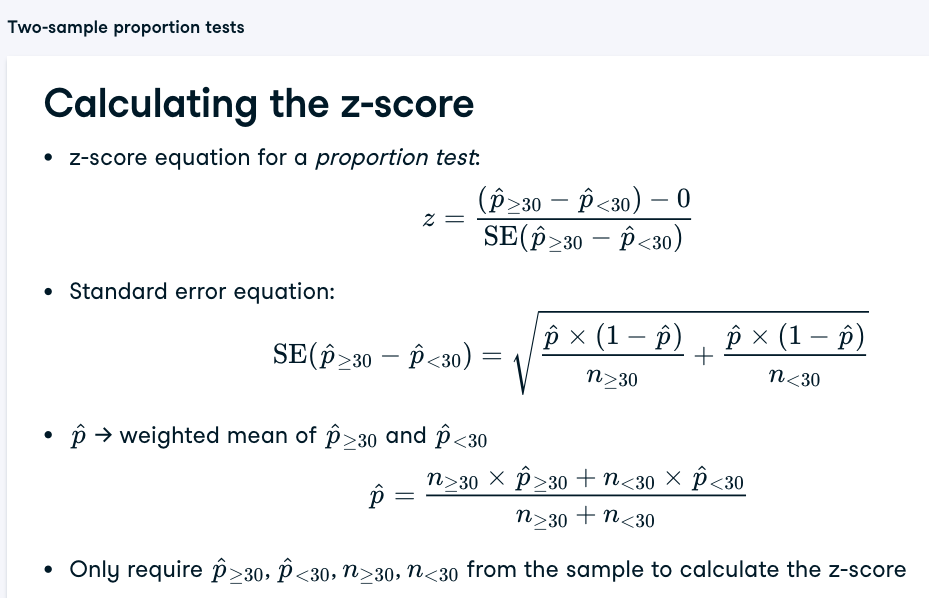

In [646]:
# Manual 2 sample proportions z-test

# --- 1. Compute pooled (weighted) proportion ---
# Combines success rates across both samples to estimate shared population proportion under H₀
p_weighted = ((p_control * n_control) + (p_group3 * n_group3)) / (n_control + n_group3)

# --- 2. Compute standard error (SE) ---
# Formula for SE of difference between two proportions
standard_error = np.sqrt(
    (p_weighted * (1 - p_weighted)) / n_control +
    (p_weighted * (1 - p_weighted)) / n_group3
)

# --- 3. Compute z-score ---
# Measures how many SEs the observed difference is away from 0
z_score = (p_group3 - p_control) / standard_error

# --- 4. Compute two-tailed p-value ---
# Multiply by 2 since we're testing for any difference (not just greater or less)
alpha = 0.05
p_value = 2 * (1 - norm.cdf(abs(z_score)))
tcrit = norm.ppf(1 - alpha/2)
SE_ci = np.sqrt(
    (p_control * (1 - p_control)) / n_control +
    (p_group3 * (1 - p_group3)) / n_group3
)

ci_lower = (p_group3 - p_control) - tcrit * SE_ci
ci_upper = (p_group3 - p_control) + tcrit * SE_ci

# --- 5. Print summary statistics ---
print("=== Two-Sample Proportion Z-Test ===")
print(f"Group 3 proportion: {p_group3:.4f}")
print(f"Control proportion: {p_control:.4f}")
print(f"Pooled (weighted) proportion: {p_weighted:.4f}")
print(f"Standard Error: {standard_error:.4f}")
print(f"Z-Score: {z_score:.3f}")
print(f"Two-tailed p-value: {p_value:.4f}")
print(f"Critical Value: {tcrit:.4f}")
print(f"SE CI: {SE_ci:.4f}")
print(f"Confidence Interval: {ci_lower:.3f}, {ci_upper:.3f}")

# --- 6. Decision rule ---
alpha = 0.05
if p_value < alpha:
    print(f"Reject H₀ ✅ (p < {alpha}) → Significant difference between Group 3 and Control")
else:
    print(f"Fail to Reject H₀ ❌ (p ≥ {alpha}) → No significant difference between Group 3 and Control")

=== Two-Sample Proportion Z-Test ===
Group 3 proportion: 0.4540
Control proportion: 0.3935
Pooled (weighted) proportion: 0.4239
Standard Error: 0.0325
Z-Score: 1.863
Two-tailed p-value: 0.0624
Critical Value: 1.9600
SE CI: 0.0324
Confidence Interval: -0.003, 0.124
Fail to Reject H₀ ❌ (p ≥ 0.05) → No significant difference between Group 3 and Control


In [647]:
# scipy 2 sample proportions ztest
from statsmodels.stats.proportion import proportions_ztest

# --- 1. Extract group sizes (n) ---
n_control = df_conversion_variant.loc[df_conversion_variant['variant'] == 'control', 'UserID'].iloc[0]
n_group3 = df_conversion_variant.loc[df_conversion_variant['variant'] == 'group_3', 'UserID'].iloc[0]

# --- 2. Extract counts of conversions (successes) ---
counts_control = df_conversion_variant.loc[df_conversion_variant['variant'] == 'control', 'Purchased'].iloc[0]
counts_group3 = df_conversion_variant.loc[df_conversion_variant['variant'] == 'group_3', 'Purchased'].iloc[0]

# --- 3. Combine into arrays for z-test input ---
n_array = [n_group3, n_control]               # sample sizes per group
counts_array = [counts_group3, counts_control] # number of "successes" per group

# --- 4. Run two-sample z-test for proportions ---
# H₀: p₁ = p₂ (no difference)
# H₁: p₁ ≠ p₂ (two-tailed)
z_score, p_value = proportions_ztest(count=counts_array, nobs=n_array)

# --- 5. Print results ---
print("=== Two-Sample Proportion Z-Test ===")
print(f"Group Sample Sizes: Control = {n_control}, Group 3 = {n_group3}")
print(f"Conversion Counts: Control = {counts_control}, Group 3 = {counts_group3}")
print(f"Z-Score: {z_score:.3f}")
print(f"Two-tailed p-value: {p_value:.4f}")

# --- 6. Interpret results ---
alpha = 0.05
if p_value < alpha:
    print(f"Reject H₀ ✅ (p < {alpha}) → Significant difference in conversion rates between Group 3 and Control.")
else:
    print(f"Fail to Reject H₀ ❌ (p ≥ {alpha}) → No significant difference in conversion rates detected.")

=== Two-Sample Proportion Z-Test ===
Group Sample Sizes: Control = 460, Group 3 = 467
Conversion Counts: Control = 181, Group 3 = 212
Z-Score: 1.863
Two-tailed p-value: 0.0624
Fail to Reject H₀ ❌ (p ≥ 0.05) → No significant difference in conversion rates detected.


---

## Chi-square Test of Independence

* The Chi-square test of independence checks whether 2 categorical varaibales are statistically independent
* Compare proportions in 2 categorical variables (3+ comparisons)
* A Chi-square test is what you’d get if you ran a logistic regression and only cared whether the predictor(s) significantly improve model fit (via a likelihood ratio test, which itself uses a Chi-square statistic).
    * χ2=−2(LLnull​−LLmodel​)

| **Hypothesis** | **Formal Description**                                                                                                                  | **Interpretation**                                                   |
| -------------- | --------------------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------- |
| **H₀:**        | Conversion rate is **independent of group** (no differences) → $p_\text{control} = p_\text{group1} = p_\text{group2} = p_\text{group3}$ | Group assignment has **no effect** on conversion.                    |
| **H₁:**        | Conversion rate is **dependent on group** → at least **one group’s rate differs**                                                       | At least one group’s conversion rate is **significantly different**. |

In [594]:
expected, observed, stats = pg.chi2_independence(data=df_conversion, 
                                                 x="variant", 
                                                 y="Purchased", 
                                                 correction=False) # correction for small sample size

In [614]:
# if independent, expected conversion rate would be same across variants
expected[2] = expected[1] / (expected[1] + expected[0])
print(expected)

Purchased           0           1         2
variant                                    
control    265.384615  194.615385  0.423077
group_1    280.384615  205.615385  0.423077
group_2    264.807692  194.192308  0.423077
group_3    269.423077  197.576923  0.423077


In [615]:
observed[2] = observed[1] / (observed[1] + observed[0])
print(observed)

Purchased    0    1         2
variant                      
control    279  181  0.393478
group_1    284  202  0.415638
group_2    262  197  0.429194
group_3    255  212  0.453961


### `stats` Output Overview

| **Column** | **Meaning**                                                     | **Interpretation**                                                                                                 |
| ---------- | --------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------ |
| **test**   | The specific Chi-square variant used                            | Each row represents a different version of the Chi-square test (e.g. Pearson, log-likelihood, etc.).               |
| **lambda** | The λ parameter in the **Cressie–Read power divergence family** | Defines how the observed vs. expected differences are weighted. Pearson = 1, Log-likelihood = 0, etc.              |
| **chi2**   | The Chi-square statistic value                                  | Larger values → stronger evidence against H₀ (no association).                                                     |
| **dof**    | Degrees of freedom                                              | $(\text{rows} - 1) \times (\text{columns} - 1)$                                                                    |
| **pval**   | p-value for the Chi-square test                                 | Probability of seeing this χ² value (or larger) if H₀ is true.                                                     |
| **cramer** | Cramér’s V effect size                                          | Measures **strength of association** between categorical variables. Ranges from 0 (no association) to 1 (perfect). |
| **power**  | Test power (1 − β)                                              | Probability of detecting a real effect if it exists. Depends on effect size, n, α.                                 |

In [602]:
# chi-square output, multiple tests 
# USE `pearson` by default
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  3.656614  3.0  0.301011  0.044196  0.329789
1        cressie-read  0.666667  3.656648  3.0  0.301006  0.044197  0.329792
2      log-likelihood  0.000000  3.657514  3.0  0.300900  0.044202  0.329865
3       freeman-tukey -0.500000  3.658861  3.0  0.300735  0.044210  0.329978
4  mod-log-likelihood -1.000000  3.660808  3.0  0.300497  0.044222  0.330141
5              neyman -2.000000  3.666504  3.0  0.299800  0.044256  0.330619


| **Observation**                                                             | **Interpretation**                                                                                   |
| --------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------- |
| `chi2 ≈ 3.66`, `df = 3`, `pval ≈ 0.30`                                      | → No significant association between variant and conversion rate.                                    |
| `cramer ≈ 0.044`                                                            | → Extremely weak relationship between variant and conversion.                                        |
| `power ≈ 0.33`                                                              | → Low power — test may not reliably detect moderate effects.                                         |
| All tests (Pearson, log-likelihood, etc.) give **almost identical results** | → The data is stable and sample sizes are large enough that the choice of λ makes little difference. |

---

## Post-hoc Analysis

* Adjusted standardized residual (ASRs)
* Behave like z-scores:
they measure how far each observed cell count deviates from its expected count,
in units of standard error.

| **ASR value**           | **Interpretation**                                                     |
| ----------------------- | ---------------------------------------------------------------------- |
| ≈ 0                     | Observed ≈ Expected (fits model of independence)                       |
| > +1.96                 | Observed **significantly higher** than expected (α = 0.05, two-tailed) |
| < -1.96                 | Observed **significantly lower** than expected                         |
| Between -1.96 and +1.96 | No significant deviation (typical variation)                           |

In [621]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Build contingency table
contingency = pd.crosstab(df_conversion['variant'], df_conversion['Purchased'])

# Run chi-square
chi2, p, dof, expected = chi2_contingency(contingency)

# Compute adjusted standardized residuals
residuals = (contingency - expected) / np.sqrt(expected)
print(residuals)

Purchased         0         1
variant                      
control    0.835780 -0.975981
group_1    0.215912 -0.252131
group_2   -0.172538  0.201481
group_3   -0.878700  1.026100


| Variant | Purchased = 0 | Purchased = 1 | Interpretation                                                                              |
| ------- | ------------- | ------------- | ------------------------------------------------------------------------------------------- |
| control | **0.84**      | **-0.98**     | Slightly *more non-purchasers* and *fewer purchasers* than expected, but not significant.   |
| group_1 | 0.22          | -0.25         | Almost identical to expected values.                                                        |
| group_2 | -0.17         | 0.20          | Also nearly identical to expectation.                                                       |
| group_3 | -0.88         | **1.03**      | Slightly *fewer non-purchasers* and *more purchasers* than expected, but well within noise. |

---

In [616]:
# traditional, 2 categorical variables 
expected, observed, stats = pg.chi2_independence(data=stack_overflow, 
                                                 x="job_sat", 
                                                 y="age_cat", 
                                                 correction=False) # correction for small sample size

In [617]:
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  5.552373  4.0  0.235164  0.049555  0.437417
1        cressie-read  0.666667  5.554106  4.0  0.235014  0.049563  0.437545
2      log-likelihood  0.000000  5.558529  4.0  0.234632  0.049583  0.437871
3       freeman-tukey -0.500000  5.562688  4.0  0.234274  0.049601  0.438178
4  mod-log-likelihood -1.000000  5.567570  4.0  0.233854  0.049623  0.438538
5              neyman -2.000000  5.579519  4.0  0.232828  0.049676  0.439419


---

**Interpretaion:**
* p-value indicates that we fail to reject the null hypothesis that job satisfaction and age are related
* therefore we conclude that are independent and knowing job satisfaction is not useful in predicting the probability of a given age category

---

## Chi-square Goodness of Fit Test

* Compare proportions of 1 categorical variable to a hypothesized distriibution

|                                 | **Statement**                                                                                                          | **Interpretation**                                                               |
| ------------------------------- | ---------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------- |
| **H₀ (Null Hypothesis)**        | The **observed frequencies** match the **expected frequencies** — i.e., the data follow the hypothesized distribution. | The sample fits the expected proportions (e.g., fair die, equal category rates). |
| **H₁ (Alternative Hypothesis)** | The **observed frequencies** do **not** match the expected frequencies — at least one category differs.                | The data deviate from the expected distribution; the model doesn’t fit well.     |

In [618]:
import numpy as np
from scipy.stats import chisquare

# Observed and expected frequencies
observed = np.array([8, 9, 19, 5, 8, 11])
expected = np.array([10, 10, 10, 10, 10, 10])

# Chi-square goodness-of-fit test
chi2_stat, p_val = chisquare(f_obs=observed, f_exp=expected)

print(f"Chi-square Statistic: {chi2_stat:.3f}")
print(f"p-value: {p_val:.4f}")

Chi-square Statistic: 11.600
p-value: 0.0407


---

Interpretation: 

* p-value < 0.05 suggests that the observed frequencies differs from expected, and differences are statistically significant
* Reject null that frequencies match

---

# Experimental Design

## Block Randomization

### **What It Is**
Block randomization divides participants (or users) into small, predefined *blocks*.  
Each block contains all experimental **conditions** (e.g., A/B variants) in equal proportion, and the order within each block is **randomized**.

---

### **How It Works**
- Define a block size (e.g., 4 users per block for two variants).  
- Within each block, assign equal numbers to each condition (e.g., 2×A, 2×B).  
- Randomize order within the block → repeat for each subsequent block.  
- Ensures balance throughout the experiment, not just at the end.

---

### **What Problem It Solves**
- Prevents **imbalances** caused by uneven user arrivals over time.  
- Reduces **temporal bias** from changing conditions (e.g., new content, peak hours).  
- Keeps **treatment groups comparable** across key covariates like device, region, or time.

---

### **When It’s Most Useful**
Even in fixed-sample designs, it’s helpful when:
- User traffic or behavior **fluctuates** (e.g., weekends vs. weekdays).  
- There are **multiple overlapping tests** or **segmented audiences**.  
- You need **balanced representation** across subgroups or time periods.

---

### **Streaming Service Use Cases**
1. Testing new **recommendation algorithms** — balance across time blocks.  
2. **Personalization experiments** — equal distribution across device types or regions.  
3. **Promotional content tests** — balanced exposure across user cohorts.  
4. **UI layout A/B tests** — maintain parity across platforms (mobile, TV, web).  
5. **Playback QoE trials** — compare codecs fairly under different network conditions.


In [623]:
# --- Parameters ---
n_users = 1000                # total number of users
conditions = ['A', 'B']       # experiment variants
block_size = 4                # must be a multiple of len(conditions)

# --- Create blocks ---
n_blocks = n_users // block_size
assignments = []

for _ in range(n_blocks):
    # equal representation of each condition in the block
    block = np.tile(conditions, block_size // len(conditions))
    np.random.shuffle(block)  # randomize order within block
    assignments.extend(block)

# --- Handle leftover users (if n_users not divisible by block_size) ---
remaining = n_users - len(assignments)
if remaining > 0:
    extra = np.random.choice(conditions, remaining, replace=True)
    assignments.extend(extra)

# --- Build DataFrame ---
users = pd.DataFrame({
    'user_id': np.arange(1, n_users + 1),
    'condition': assignments
})

# --- Check balance ---
print(users['condition'].value_counts())
print(users.head(10))

condition
A    500
B    500
Name: count, dtype: int64
   user_id condition
0        1         A
1        2         B
2        3         B
3        4         A
4        5         A
5        6         B
6        7         A
7        8         B
8        9         A
9       10         B


---

## Stratified Randomization 

* This method addresses covariate imbalances by splitting subjects based on a confounding variable before random assignment. This ensures that each group is balanced with respect to that variable

* Randomly simulates users with a stratification variable (device).

* Within each stratum (e.g., mobile, tv, web), performs block randomization to keep equal representation of each condition.

* Ensures that each device group has balanced A/B assignment — avoiding confounding effects from device usage patterns.

* This approach is ideal when you expect systematic differences between user segments, like engagement level or streaming platform, that could bias results if not balanced.

In [624]:
import numpy as np
import pandas as pd

# --- Parameters ---
n_users = 1000
conditions = ['A', 'B']
block_size = 4  # must be a multiple of len(conditions)

# Example stratification variable (e.g., device type)
np.random.seed(42)
devices = np.random.choice(['mobile', 'tv', 'web'], size=n_users, p=[0.5, 0.3, 0.2])

# Build initial DataFrame
users = pd.DataFrame({
    'user_id': np.arange(1, n_users + 1),
    'device': devices
})

# --- Stratified Block Randomization ---
assignments = []

for device_type, group in users.groupby('device'):
    group_size = len(group)
    n_blocks = group_size // block_size
    device_assignments = []

    for _ in range(n_blocks):
        # create equal representation within block
        block = np.tile(conditions, block_size // len(conditions))
        np.random.shuffle(block)
        device_assignments.extend(block)
    
    # handle leftover users
    remaining = group_size - len(device_assignments)
    if remaining > 0:
        extra = np.random.choice(conditions, remaining, replace=True)
        device_assignments.extend(extra)
    
    # assign back to group
    group = group.copy()
    group['condition'] = device_assignments
    assignments.append(group)

# Combine all stratified groups
users_stratified = pd.concat(assignments).sort_values('user_id')

# --- Check balance ---
print(users_stratified.groupby(['device', 'condition']).size())
print(users_stratified.head(10))

device  condition
mobile  A            252
        B            251
tv      A            149
        B            149
web     A            100
        B             99
dtype: int64
   user_id  device condition
0        1  mobile         A
1        2     web         B
2        3      tv         B
3        4      tv         A
4        5  mobile         B
5        6  mobile         B
6        7  mobile         A
7        8     web         B
8        9      tv         B
9       10      tv         A


---

## Factorial Designs

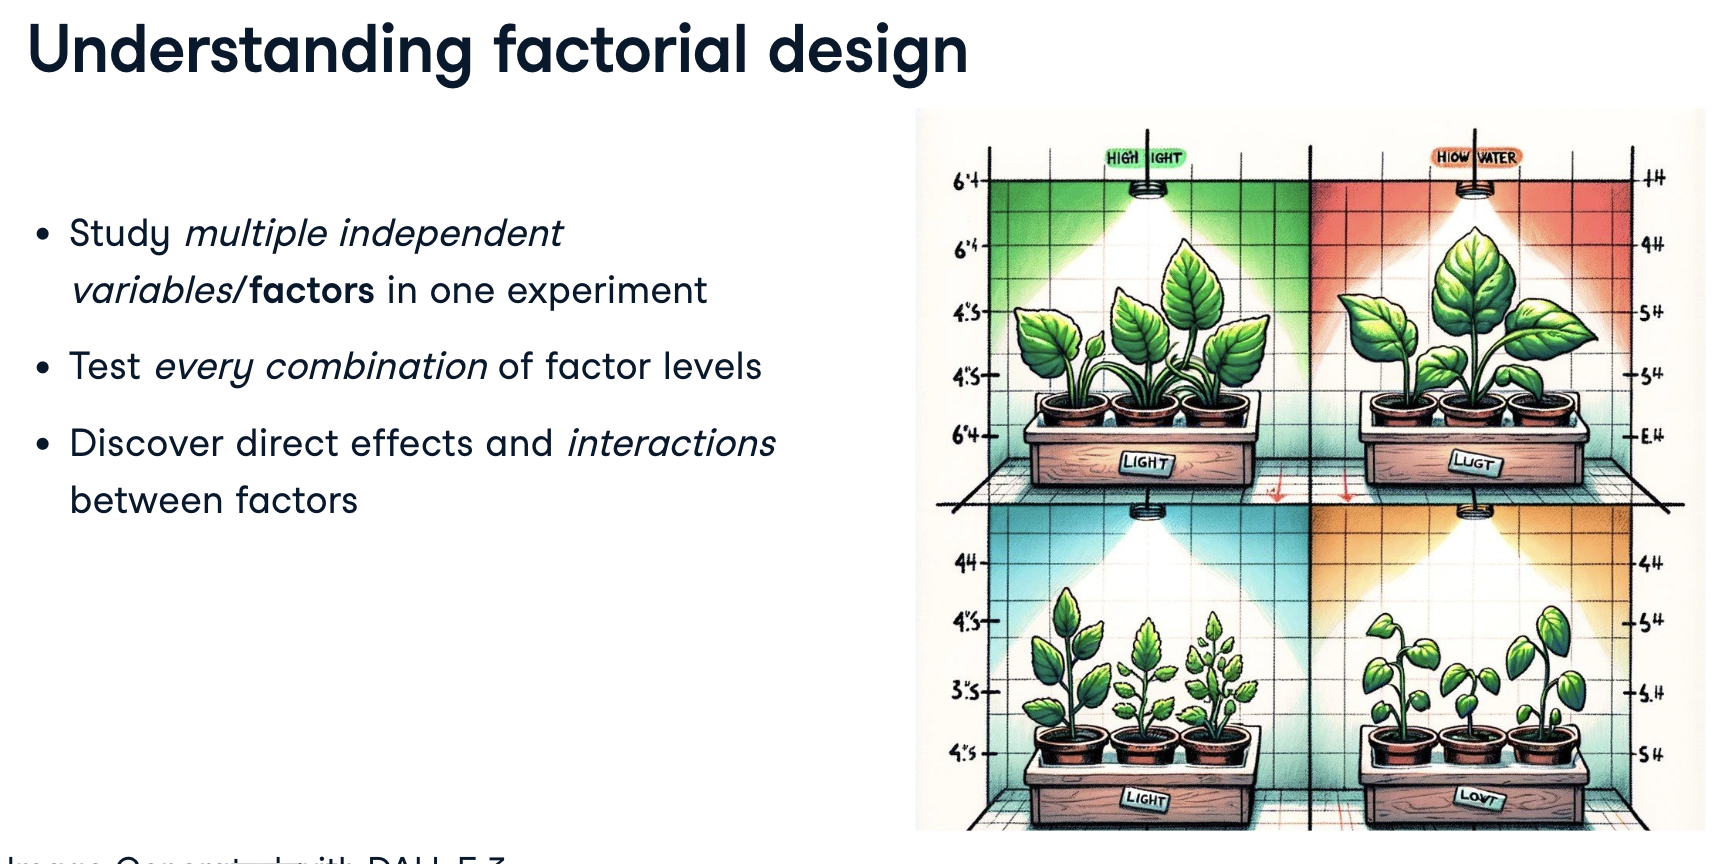

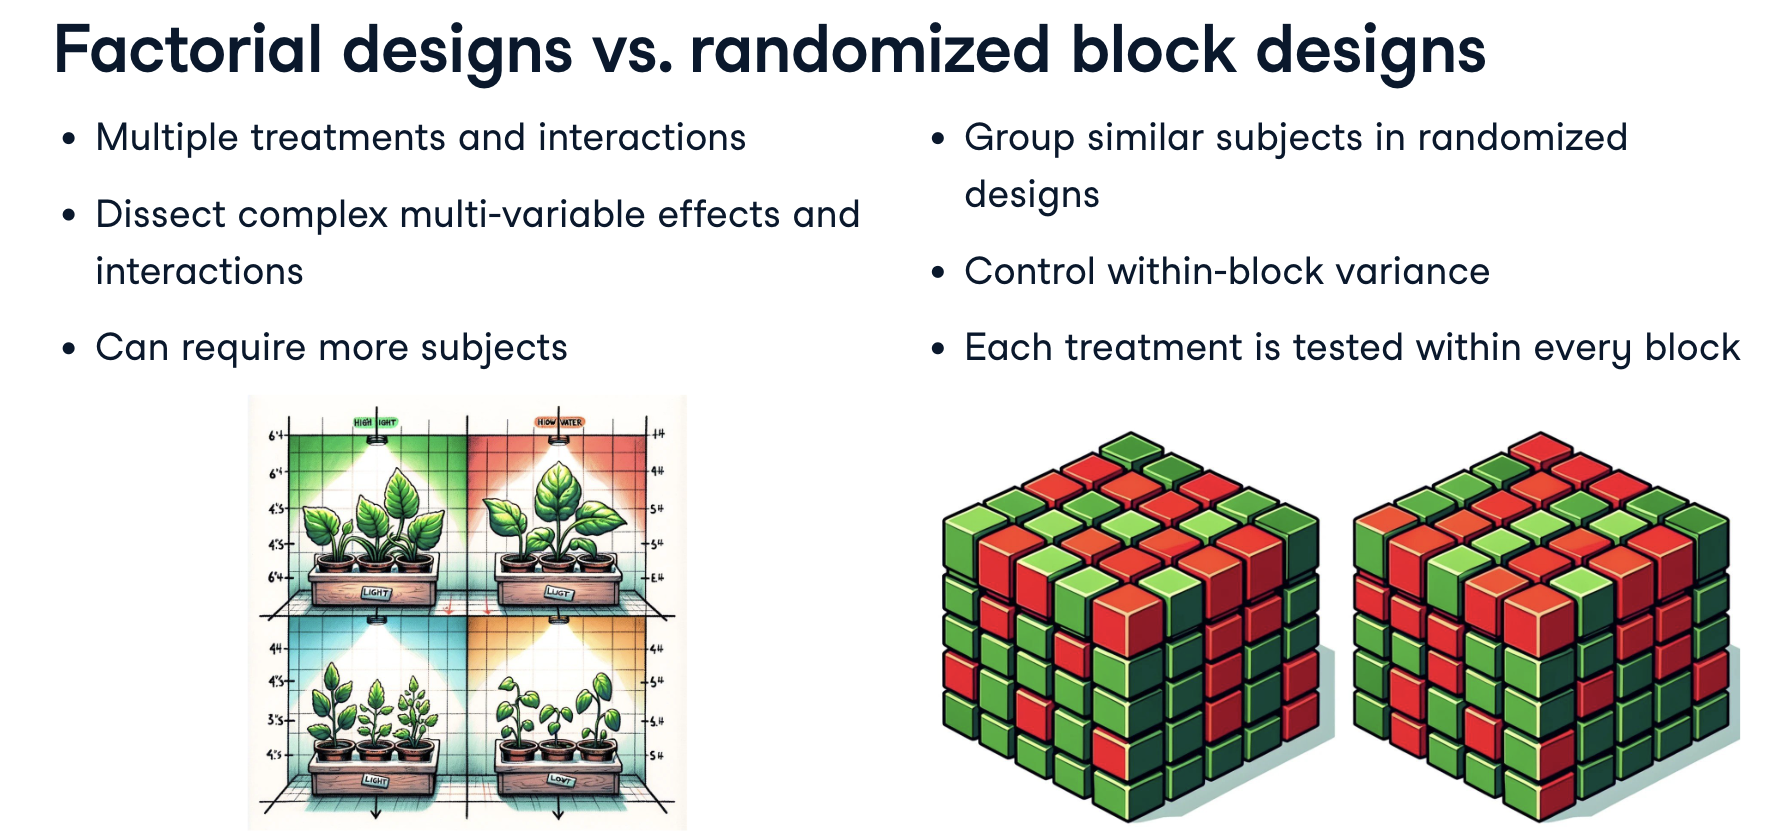

## Analyzing Effects - Covariate Adjustment

* when analyzing the effect of treatment on the outcome, we often need to control for `confounders` or covariates that influences both the treatment and the outcome
* linear regression model allows us to model these effects while controlling for the confounding variable
* Ex: Study a teaching methods effect on student test scores
    * Important covariates => student's prior education level, prior knowledge with subject, whether student has learning disability

In [625]:
df_performance = pd.read_csv('data/athletic_perf.csv')
df_performance

Athlete_ID Training_Program    Diet_Type Initial_Fitness  Performance_Inc
0             1         Strength         Keto             Low         8.749524
1             2             HIIT  Plant-Based            High         9.452781
2             3         Strength  Plant-Based             Low        13.928506
3             4         Strength  Plant-Based            High         9.605557
4             5             HIIT  Plant-Based             Low         7.547894
..          ...              ...          ...             ...              ...
295         296        Endurance  Plant-Based          Medium         9.438768
296         297        Endurance         Keto             Low        10.749170
297         298        Endurance  Plant-Based          Medium         7.902343
298         299        Endurance         Keto          Medium         5.761285
299         300        Endurance  Plant-Based             Low         9.298269

[300 rows x 5 columns]

In [626]:
df_performance.groupby(['Training_Program'])['Performance_Inc'].mean()

Training_Program
Endurance     9.928647
HIIT          9.993296
Strength     10.417455
Name: Performance_Inc, dtype: float64

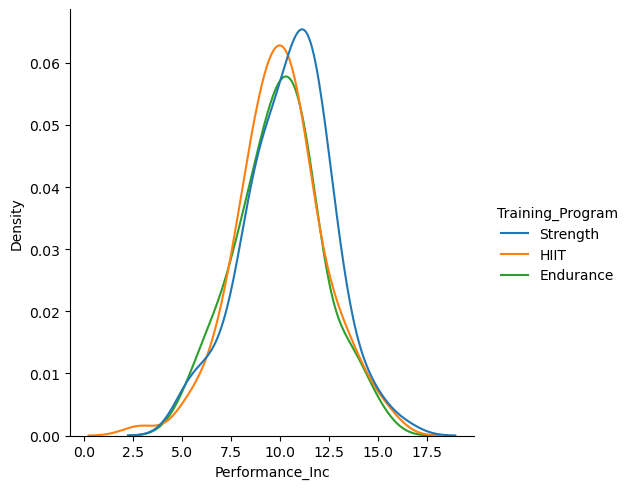

In [627]:
sns.displot(data=df_performance, x="Performance_Inc", hue="Training_Program", kind="kde");

In [628]:
model = smf.ols('Performance_Inc ~ C(Training_Program) + C(Initial_Fitness)', data=df_performance).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Performance_Inc   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8339
Date:                Wed, 15 Oct 2025   Prob (F-statistic):              0.504
Time:                        09:26:33   Log-Likelihood:                -657.60
No. Observations:                 300   AIC:                             1325.
Df Residuals:                     295   BIC:                             1344.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

---

Interpretation: 
* p-value for model is 0.5 (at least 1 covariate is useful in predicting outcome) indicating no covariate is useful in predicting the outcome
* R2 is near 0
* all p-values for covariates are >0.05 indicating that the coefficients are not statistically different from zero
* 95CI also all contain zero which supports the above

---